In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# **Glimpse of the data**

In [ ]:
data=pd.read_csv("Classification dataset.csv")
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**This is a binary classification problem**

In [ ]:
data.shape

(45211, 11)

In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
from numpy.lib.arraysetops import unique
cat_cols=['job','marital','education_qual','call_type',"mon",'prev_outcome','y']
for column in cat_cols:
   # col=data.columns
  unique_types=data[column].value_counts()
  print("\nIndividual Counts of ",column,": ",unique_types)


Individual Counts of  job :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Individual Counts of  marital :  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Individual Counts of  education_qual :  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

Individual Counts of  call_type :  cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

Individual Counts of  mon :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

Individual Counts of  prev_outcome :  unknown    36959
failure     4901
other   

In [ ]:
data.duplicated().sum()

6

In [ ]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(45205, 11)

Text(0, 0.5, 'Count')

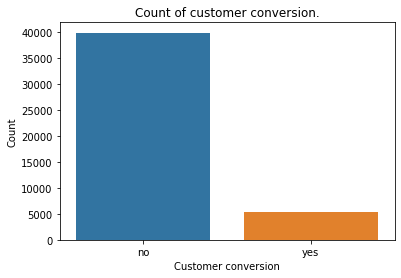

In [ ]:
sns.countplot(data=data,x='y')
plt.title('Count of customer conversion.')
plt.xlabel('Customer conversion')
plt.ylabel('Count')

# **Data Cleaning** **& EDA**
 



Data is imbalanced. Need to implement data balaning techniques to make the data set balanced. This will be done in the later stages.

In [ ]:
data.y=data.y.map({'yes':1,'no':0})

In [ ]:
data.sample(7)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
34565,31,blue-collar,single,secondary,cellular,5,may,568,1,failure,1
15745,33,blue-collar,married,secondary,cellular,21,jul,81,1,unknown,0
30653,29,unemployed,single,secondary,cellular,6,feb,93,1,unknown,0
4979,32,blue-collar,single,secondary,unknown,21,may,445,1,unknown,0
13435,54,services,married,secondary,cellular,9,jul,85,1,unknown,0
3755,43,admin.,single,secondary,unknown,16,may,244,1,unknown,0
20107,38,management,married,tertiary,cellular,11,aug,111,2,unknown,0


## 1. Age column

In [ ]:
# Checking for null values
data['age'].isnull().sum()

0

<Axes: xlabel='age'>

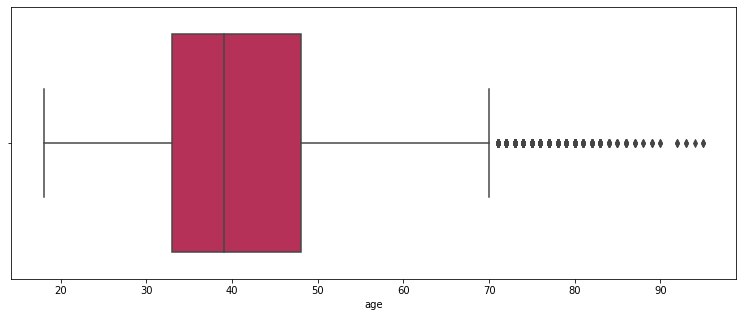

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='age',palette='rocket')

There are outliers !!

In [ ]:
def outlier(feature):  # Method to detect and correct outliers
  
  # global abc
  iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
  total=0
  upper_threshold=data[feature].quantile(0.75)+(1.5*iqr)
  lower_threshold=data[feature].quantile(0.25)-(1.5*iqr)
  print("U.Threshold: ",upper_threshold,"\nL.Threshold: ",lower_threshold)


  for i in data[feature][:]:
    if i>upper_threshold or i<lower_threshold:
      total+=1
      print("Outlier detected!: ",i)
      #data[feature] = data[feature].clip(lower_threshold,upper_threshold)


  return upper_threshold,lower_threshold,total

In [ ]:
a,b,c=outlier('age')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(a,b,c))

U.Threshold:  70.5 
L.Threshold:  10.5
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  75
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  72
Outlier detected!:  71
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  71
Outlier detected!:  85
Outlier detected!:  72
Outlier detected!:  90
Outlier detected!:  71
Outlier detected!:  82
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  71
Outlier detected!:  75
Outlier detected!:  78
Outlier detected!:  85
Outlier detected!:  80
Outlier detected!:  71
Outlier detected!:  78
Outlier detected!:  73
Outlier detected!:  75
Outlier detected!:  94
Outlier detected!:  72
Outlier detected!:  83
Outlier detected!:  79
Outlier detected!:  78
Outlier detected!:  83
Outlier detected!:  73
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  77
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  73
Outlier detected!:  77
Outlier detected!:  71
Outlier detected!:

There are 487 outliers in the age column.

UTL = 70.5 

LTL = 10.5

In [ ]:
age=data[['age','y']]
age_converted=age.query('y==1').shape[0]

In [ ]:
total_conversion_rate_age=(age_converted/data.shape[0])*100
total_conversion_rate_age

11.700033182170113

In [ ]:
age_outliers_converted = data.query('age>70.5 and y==1')
age_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29865,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,1
31055,85,retired,married,primary,telephone,12,feb,165,2,unknown,1
31057,72,retired,married,tertiary,cellular,13,feb,99,1,unknown,1
31069,90,retired,divorced,secondary,cellular,13,feb,152,3,unknown,1
31077,71,retired,married,primary,cellular,16,feb,93,5,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,cellular,25,oct,211,2,success,1
45191,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,1
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1


In [ ]:
conversion_rate_in_age_outliers=(age_outliers_converted.shape[0]/487)*100
conversion_rate_in_age_outliers

44.76386036960985

Conversion rate in the ***outliers of age*** column is 44.7%, where as in the ***age*** column it is 11.7% only. This is in line with our G.K. that old age people are more likely to subscribe to a policy.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Age')

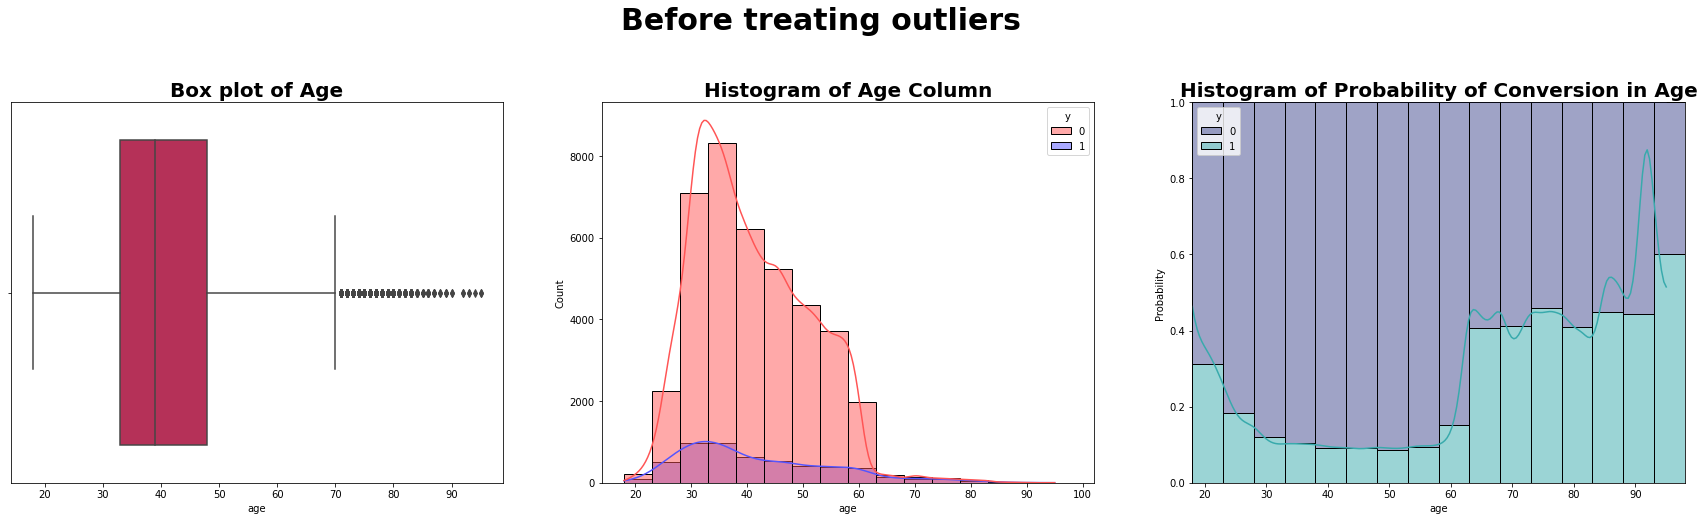

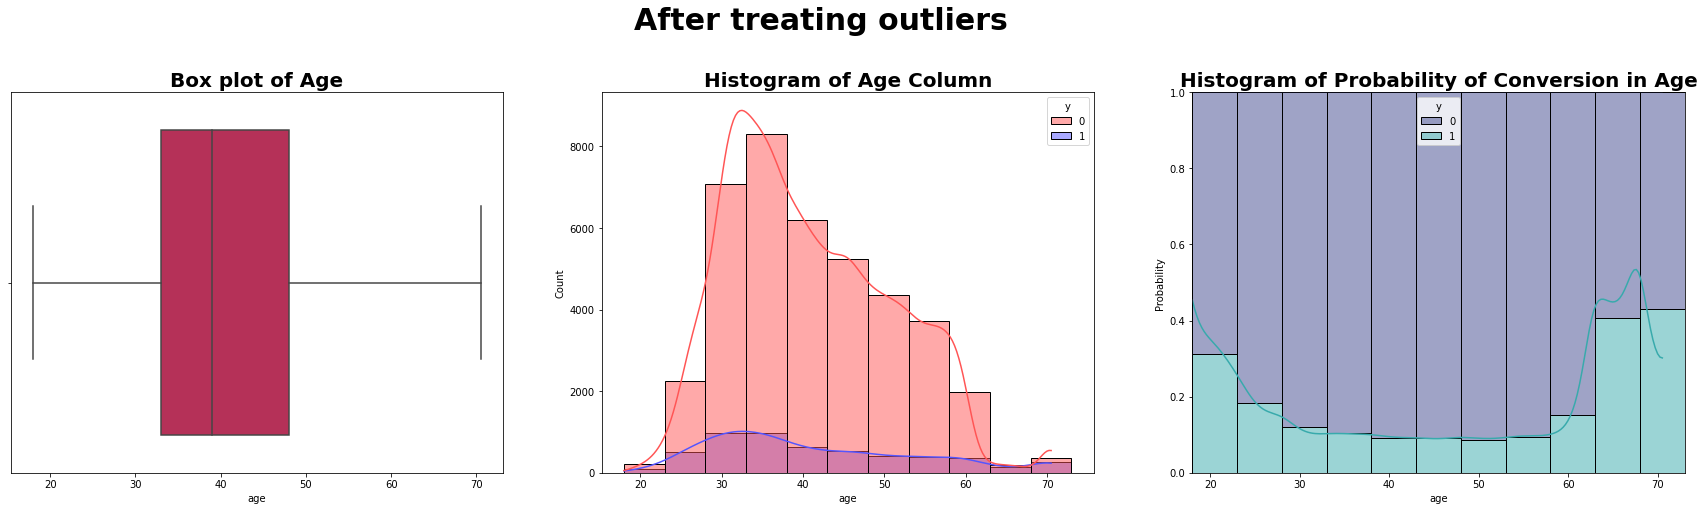

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='age',palette='rocket',ax=axes[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )

data['age'] = data['age'].clip(10.5,70.5) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='age',palette='rocket',ax=axes2[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes2[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )



From the above plots, though the count for the age group 30 to 40 is high,probability of conversion is very low(around 0.1).The business firm contacted the age group 20 and 25 in less number, also for this age group the probability of conversion lies in between 0.2 to 0.3 only. The businees firm has good scope in this age group to convert them to take a policy.

## 2. Job column

In [ ]:
data['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Univariation**

<Axes: xlabel='count', ylabel='job'>

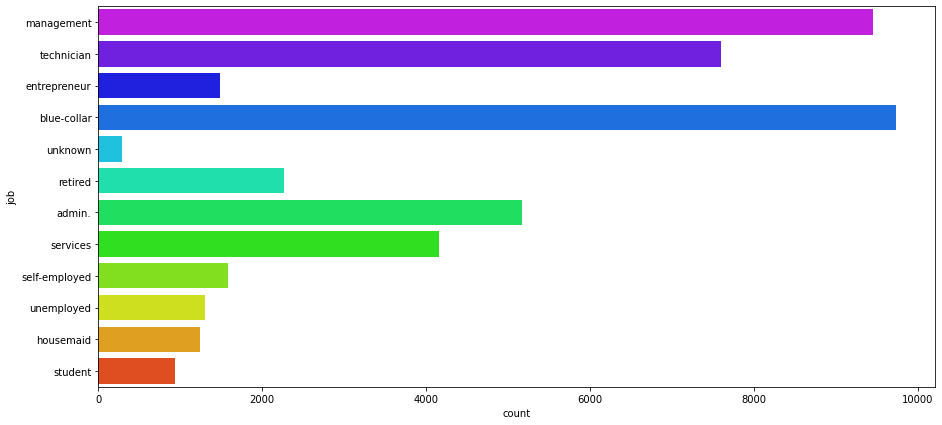

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,y='job',palette='gist_rainbow_r')

<Axes: xlabel='job', ylabel='count'>

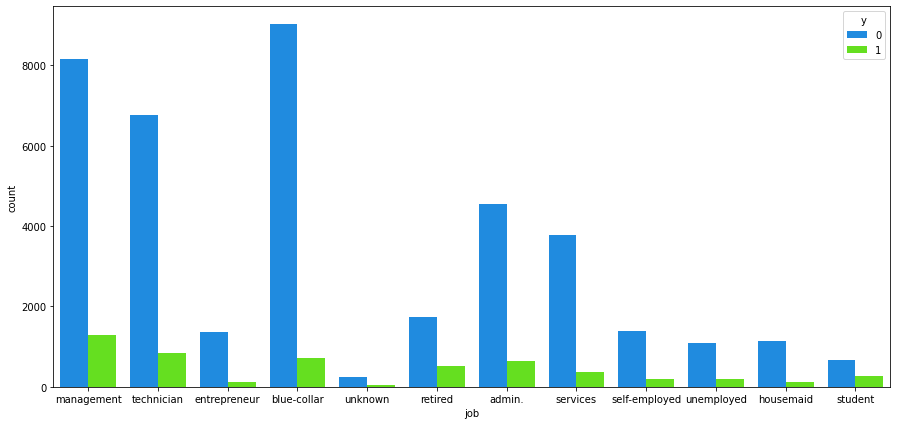

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='job',hue='y',palette='gist_rainbow_r')

In [ ]:
jobs=pd.pivot_table(data=data,values='y',index='job').sort_values(by='y')
jobs['y']=jobs['y']*100
jobs

,y
job,
blue-collar,7.276465
entrepreneur,8.271688
housemaid,8.790323
services,8.885143
technician,11.058452
unknown,11.805556
self-employed,11.842939
admin.,12.205029
management,13.757005


In [ ]:
jobs.index

Index(['blue-collar', 'entrepreneur', 'housemaid', 'services', 'technician',
       'unknown', 'self-employed', 'admin.', 'management', 'unemployed',
       'retired', 'student'],
      dtype='object', name='job')

**Bi-variation**

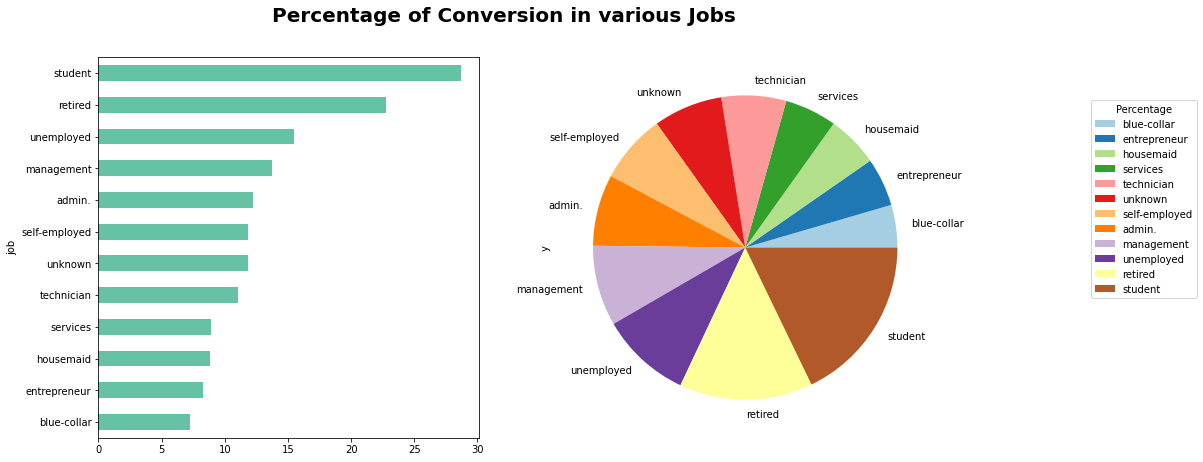

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.suptitle("Percentage of Conversion in various Jobs",fontweight='bold',fontsize=20)


jobs.plot(kind='barh',ax=axes[0],legend=None,cmap='Set2')
jobs.plot(kind='pie',subplots=True,ax=axes[1],cmap="Paired")
plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')


Text(0.5, 1.0, 'Count Plot of Job Column')

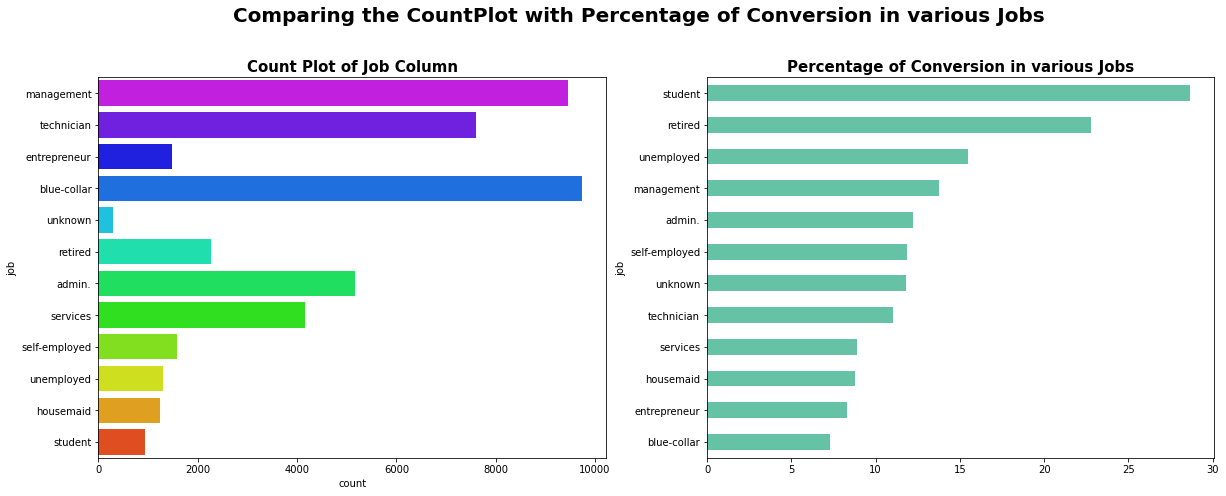

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,7))
plt.suptitle("Comparing the CountPlot with Percentage of Conversion in various Jobs",fontweight='bold',fontsize=20,y=1.02)

jobs.plot(kind='barh',ax=axes[1],legend=None,cmap='Set2').set_title("Percentage of Conversion in various Jobs",fontsize=15,fontweight='bold')
sns.countplot(data=data,y='job',palette='gist_rainbow_r',ax=axes[0]).set_title("Count Plot of Job Column",fontsize=15,fontweight='bold')


([], [])

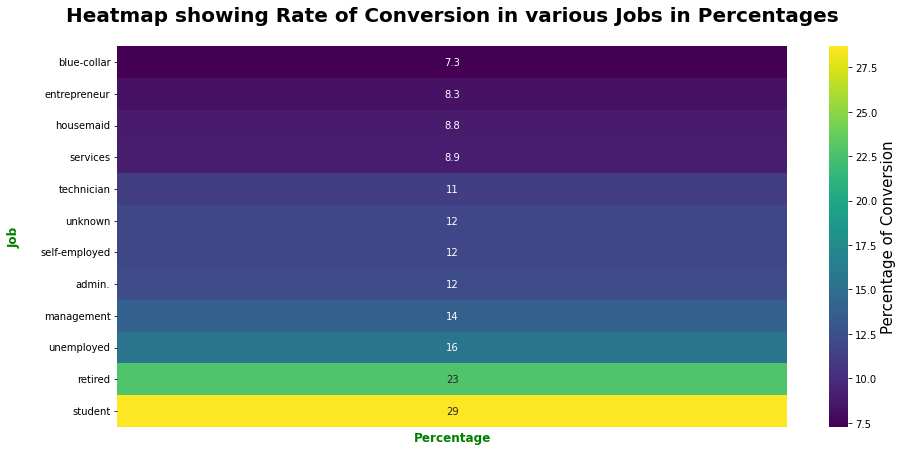

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data=jobs,annot=True,cmap='viridis',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
plt.title("Heatmap showing Rate of Conversion in various Jobs in Percentages",fontsize=20,fontweight='bold',pad=25)
plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
plt.ylabel("Job",fontsize=12,labelpad=20,fontweight='bold',color='green')
plt.xticks([])


In [ ]:
# Jobs=data.groupby('job')['y'].mean().sort_values()
# Jobs.reset_index()

From the above plots, it is evident that students and retired people have more conversion rate. But the business firm has contacted blue-collared people more where the conversion rate is the poorest among the all categories (This may be the reason that they are less educated and might have receiving the benefits of 
health schemes by the Government). Hence it is recommended to reach students, retired, unemployed and management people having conversion rates 29%,23%,16% and 14% respectively, rather than reaching blue-collared people.

**Multi-variation**

Text(0.5, 0, 'Duration')

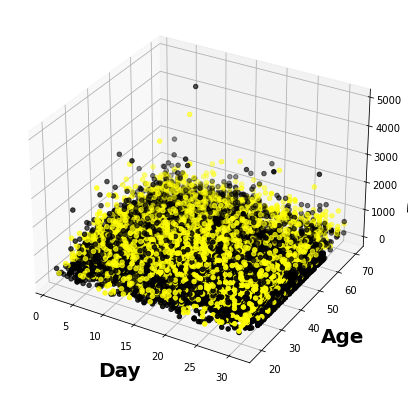

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = plt.axes(projection ='3d')

y=data['age']
z=data['dur']
x=data['day']
c=data['y']

ax.scatter(x,y,z,c=c,cmap='gnuplot')

plt.xlabel("Day",fontweight='bold',fontsize=20,labelpad=10)
plt.ylabel("Age",fontweight='bold',fontsize=20,labelpad=10)
ax.set_zlabel("Duration",fontweight='bold',fontsize=20,labelpad=10)



Couldn't able to draw any inference from the above 3D plot 😥

In [ ]:
jobs_N_marital=data.pivot_table(index='marital',columns='job',values='y')
jobs_N_marital

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.120000,0.077333,0.083799,0.097826,0.127813,0.284706,0.157143,0.091075,0.166667,0.083243,0.157895,0.058824
married,0.113628,0.062733,0.075701,0.073465,0.126134,0.220682,0.079557,0.073982,0.185185,0.102665,0.132695,0.103448
single,0.136074,0.105760,0.113445,0.166667,0.162199,0.120370,0.192825,0.117696,0.293850,0.132493,0.194514,0.176471


In [ ]:
jobs_N_marital=jobs_N_marital.apply(lambda x: x*100)
jobs_N_marital


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,12.000000,7.733333,8.379888,9.782609,12.781278,28.470588,15.714286,9.107468,16.666667,8.324324,15.789474,5.882353
married,11.362792,6.273328,7.570093,7.346491,12.613447,22.068169,7.955690,7.398171,18.518519,10.266535,13.269494,10.344828
single,13.607412,10.575968,11.344538,16.666667,16.219885,12.037037,19.282511,11.769616,29.384966,13.249332,19.451372,17.647059


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'divorced'), Text(0, 1.5, 'married'), Text(0, 2.5, 'single')])

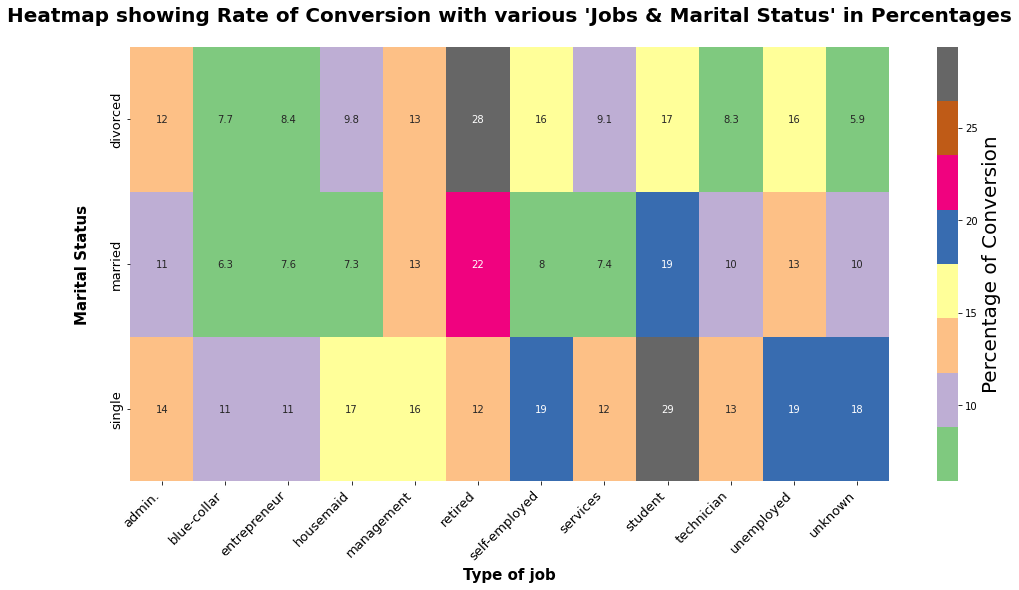

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_marital,annot=True,cmap='Accent',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Marital Status' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Marital Status",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

The above heatmap shows that the combination of student-single, retired-divorced people have highest rate of conversions 29% & 28% respectively follwed by the combinations of retired-married,student-married, unemployed-single, self_employed-single and unknown-single with conversion rates of 22%,19%,19%,19% & 18%.

Hence the businees firm may try to reach these combinations to ask them to subscribe to a policy as next choice, self_employed-single and unknown-single.

In [ ]:
jobs_N_qualification=data.pivot_table(index='education_qual',columns='job',values='y')
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,0.057416,0.058025,0.065574,0.078150,0.074830,0.223899,0.038462,0.084058,0.363636,0.082278,0.132296,0.058824
secondary,0.119014,0.080633,0.095941,0.086076,0.086530,0.210366,0.074523,0.085648,0.297244,0.099063,0.148352,0.126761
tertiary,0.173077,0.161074,0.075802,0.127168,0.145385,0.275956,0.160864,0.123762,0.264574,0.145399,0.193772,0.102564
unknown,0.105263,0.072687,0.092105,0.088889,0.198347,0.252101,0.128205,0.126667,0.263804,0.095041,0.137931,0.141732


In [ ]:
jobs_N_qualification=jobs_N_qualification.apply(lambda x: x*100)
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,5.741627,5.802502,6.557377,7.814992,7.482993,22.389937,3.846154,8.405797,36.363636,8.227848,13.229572,5.882353
secondary,11.901375,8.063315,9.594096,8.607595,8.652988,21.036585,7.452340,8.564815,29.724409,9.906292,14.835165,12.676056
tertiary,17.307692,16.107383,7.580175,12.716763,14.538462,27.595628,16.086435,12.376238,26.457399,14.539908,19.377163,10.256410
unknown,10.526316,7.268722,9.210526,8.888889,19.834711,25.210084,12.820513,12.666667,26.380368,9.504132,13.793103,14.173228


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'primary'),
  Text(0, 1.5, 'secondary'),
  Text(0, 2.5, 'tertiary'),
  Text(0, 3.5, 'unknown')])

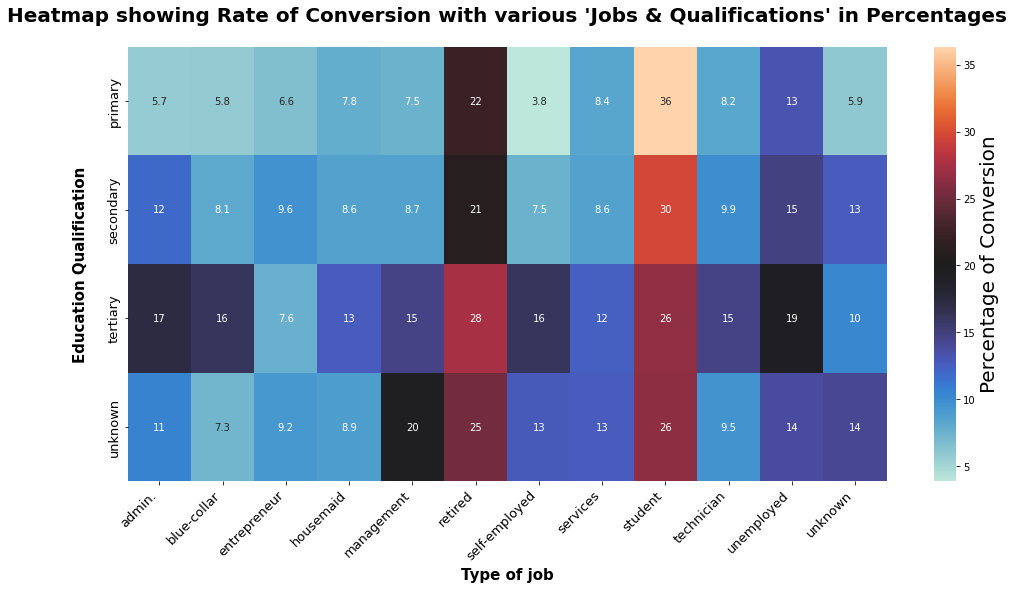

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_qualification,annot=True,cmap='icefire',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Qualifications' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Education Qualification",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)


In [ ]:
jobs_N_calltype=data.pivot_table(index='call_type',columns='job',values='y')
jobs_N_calltype

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,0.157722,0.099709,0.093291,0.112299,0.164387,0.267153,0.141144,0.121297,0.352941,0.135874,0.194164,0.206107
telephone,0.141869,0.062193,0.183908,0.092715,0.127389,0.318519,0.122449,0.070175,0.191919,0.084112,0.130000,0.108696
unknown,0.039948,0.039354,0.040359,0.032258,0.044252,0.042945,0.055416,0.035039,0.028169,0.043272,0.051282,0.018018


In [ ]:
jobs_N_calltype=jobs_N_calltype.apply(lambda x: x*100)
jobs_N_calltype


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,15.772212,9.970902,9.329140,11.229947,16.438746,26.715328,14.114391,12.129704,35.294118,13.587361,19.416386,20.610687
telephone,14.186851,6.219313,18.390805,9.271523,12.738854,31.851852,12.244898,7.017544,19.191919,8.411215,13.000000,10.869565
unknown,3.994761,3.935419,4.035874,3.225806,4.425229,4.294479,5.541562,3.503854,2.816901,4.327177,5.128205,1.801802


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'cellular'),
  Text(0, 1.5, 'telephone'),
  Text(0, 2.5, 'unknown')])

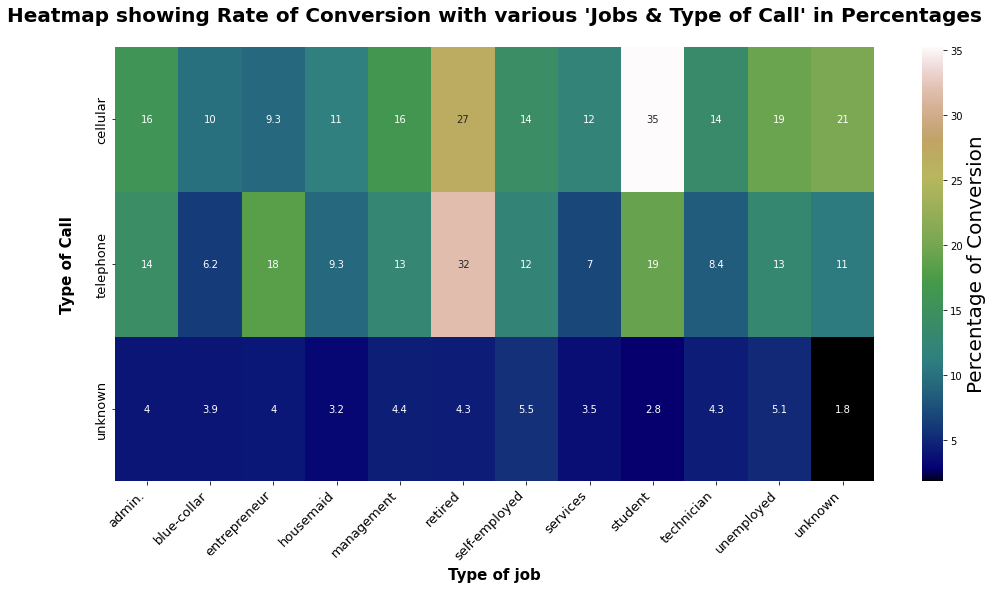

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_calltype,annot=True,cmap='gist_earth',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Type of Call' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Type of Call",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [ ]:
jobs_N_month=data.pivot_table(index='job',columns='mon',values='y')
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,0.168317,0.168975,0.521739,0.156051,0.112360,0.079219,0.123939,0.418919,0.075957,0.099526,0.352381,0.461538
blue-collar,0.102258,0.098522,0.416667,0.079404,0.059459,0.081004,0.069586,0.416667,0.051850,0.076412,0.355932,0.548387
entrepreneur,0.128571,0.134146,0.333333,0.114943,0.052632,0.096026,0.060185,1.000000,0.043269,0.068826,0.416667,0.500000
housemaid,0.196078,0.068966,0.333333,0.117647,0.062500,0.063830,0.051471,0.538462,0.072848,0.086420,0.384615,0.285714
management,0.276173,0.106727,0.490196,0.201802,0.072414,0.088083,0.145946,0.576389,0.077952,0.094891,0.474576,0.502959
retired,0.337931,0.168798,0.512195,0.363095,0.269663,0.144543,0.118812,0.560606,0.121469,0.255474,0.373134,0.463918
self-employed,0.267442,0.112676,0.333333,0.123810,0.094340,0.085020,0.107981,0.562500,0.073770,0.093617,0.538462,0.307692
services,0.100000,0.112360,0.533333,0.085714,0.096296,0.076031,0.088975,0.700000,0.061674,0.092409,0.650000,0.666667
student,0.382022,0.300000,0.411765,0.333333,0.205128,0.416667,0.211765,0.384615,0.142292,0.365385,0.512821,0.360000


In [ ]:
jobs_N_month=jobs_N_month.apply(lambda x: x*100)
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,16.831683,16.897507,52.173913,15.605096,11.235955,7.921929,12.393888,41.891892,7.595660,9.952607,35.238095,46.153846
blue-collar,10.225764,9.852217,41.666667,7.940447,5.945946,8.100358,6.958561,41.666667,5.185016,7.641196,35.593220,54.838710
entrepreneur,12.857143,13.414634,33.333333,11.494253,5.263158,9.602649,6.018519,100.000000,4.326923,6.882591,41.666667,50.000000
housemaid,19.607843,6.896552,33.333333,11.764706,6.250000,6.382979,5.147059,53.846154,7.284768,8.641975,38.461538,28.571429
management,27.617329,10.672736,49.019608,20.180180,7.241379,8.808290,14.594595,57.638889,7.795203,9.489051,47.457627,50.295858
retired,33.793103,16.879795,51.219512,36.309524,26.966292,14.454277,11.881188,56.060606,12.146893,25.547445,37.313433,46.391753
self-employed,26.744186,11.267606,33.333333,12.380952,9.433962,8.502024,10.798122,56.250000,7.377049,9.361702,53.846154,30.769231
services,10.000000,11.235955,53.333333,8.571429,9.629630,7.603093,8.897485,70.000000,6.167401,9.240924,65.000000,66.666667
student,38.202247,30.000000,41.176471,33.333333,20.512821,41.666667,21.176471,38.461538,14.229249,36.538462,51.282051,36.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'admin.'),
  Text(0, 1.5, 'blue-collar'),
  Text(0, 2.5, 'entrepreneur'),
  Text(0, 3.5, 'housemaid'),
  Text(0, 4.5, 'management'),
  Text(0, 5.5, 'retired'),
  Text(0, 6.5, 'self-employed'),
  Text(0, 7.5, 'services'),
  Text(0, 8.5, 'student'),
  Text(0, 9.5, 'technician'),
  Text(0, 10.5, 'unemployed'),
  Text(0, 11.5, 'unknown')])

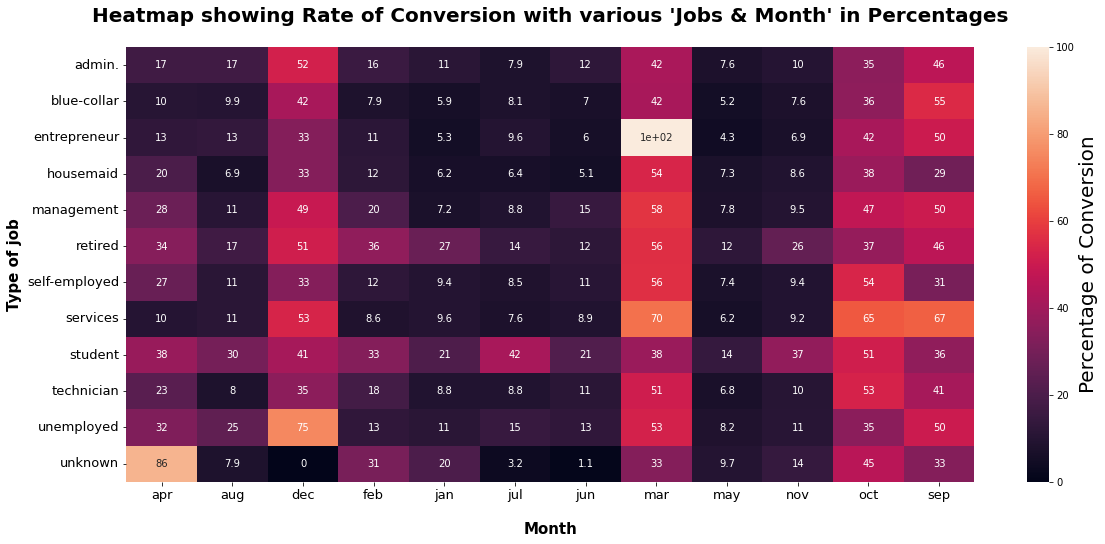

In [ ]:
plt.figure(figsize=(19,8))

sns.heatmap(data=jobs_N_month,annot=True,cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Month' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.ylabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13)
plt.xlabel("Month",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [ ]:
jobs_N_previousOutcome=data.pivot_table(index='prev_outcome',columns='job',values='y')
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,0.133748,0.059925,0.091463,0.134021,0.160920,0.221739,0.096970,0.094595,0.290598,0.124216,0.214286,0.300000
other,0.165975,0.087282,0.076923,0.153846,0.223919,0.349398,0.213115,0.101695,0.283951,0.150502,0.216216,0.500000
success,0.598039,0.574324,0.409091,0.586207,0.687339,0.718391,0.654545,0.694118,0.712644,0.563265,0.781250,0.818182
unknown,0.093827,0.064588,0.076070,0.068934,0.102057,0.175014,0.093991,0.072527,0.229709,0.089209,0.110092,0.070588


In [ ]:
jobs_N_previousOutcome=jobs_N_previousOutcome.apply(lambda x: x*100)
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,13.374806,5.992509,9.146341,13.402062,16.091954,22.173913,9.696970,9.459459,29.059829,12.421581,21.428571,30.000000
other,16.597510,8.728180,7.692308,15.384615,22.391858,34.939759,21.311475,10.169492,28.395062,15.050167,21.621622,50.000000
success,59.803922,57.432432,40.909091,58.620690,68.733850,71.839080,65.454545,69.411765,71.264368,56.326531,78.125000,81.818182
unknown,9.382656,6.458770,7.606973,6.893382,10.205686,17.501407,9.399076,7.252683,22.970904,8.920863,11.009174,7.058824


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'failure'),
  Text(0, 1.5, 'other'),
  Text(0, 2.5, 'success'),
  Text(0, 3.5, 'unknown')])

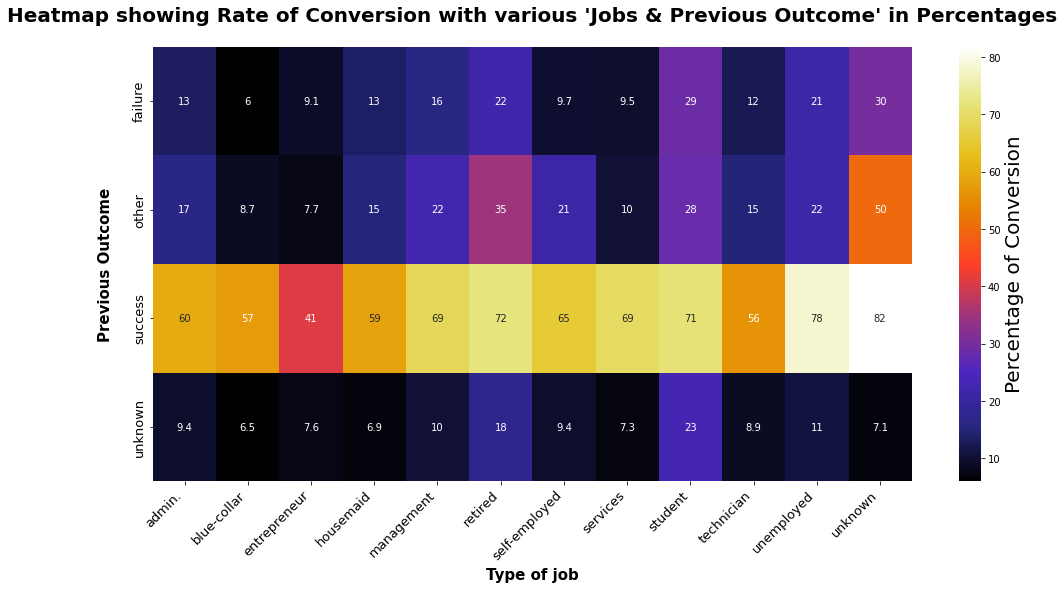

In [ ]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_previousOutcome,annot=True,cmap='CMRmap',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Previous Outcome' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Previous Outcome",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

## 6. Day Column

In [ ]:
# Checking for null values
data['day'].isnull().sum()

0

<Axes: xlabel='day'>

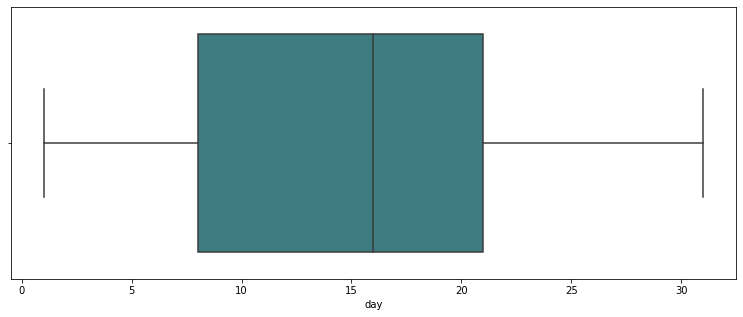

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='day',palette='crest')

There are no outliers.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Day')

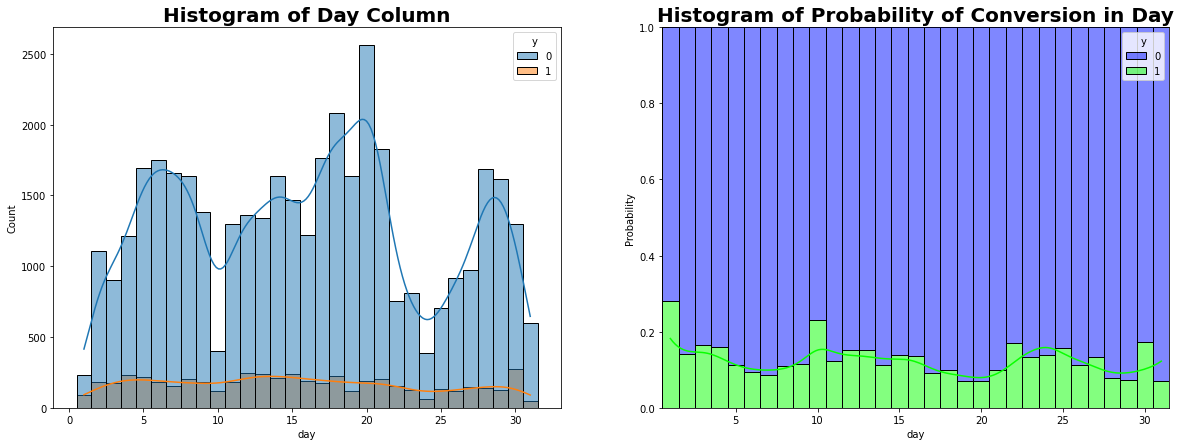

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data,x=data['day'],hue='y', binwidth=1,kde=True,ax=axes[0],discrete=True).set_title("Histogram of Day Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['day'],hue='y',palette='hsv_r',binwidth=1 ,kde=True,ax=axes[1],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Day",fontweight='bold',fontsize=20 )

## 8. Duration column

In [ ]:
data.dur.isnull().sum()


0

<Axes: xlabel='dur'>

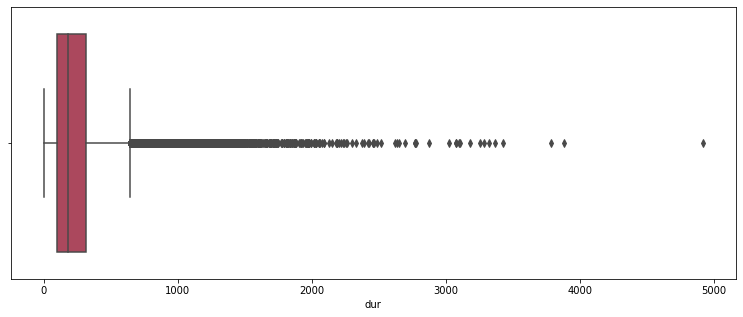

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='dur',palette='inferno')

In [ ]:
i,j,k=outlier('dur')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(i,j,k))

U.Threshold:  643.0 
L.Threshold:  -221.0
Outlier detected!:  1666
Outlier detected!:  1492
Outlier detected!:  787
Outlier detected!:  1778
Outlier detected!:  812
Outlier detected!:  1042
Outlier detected!:  1467
Outlier detected!:  1389
Outlier detected!:  849
Outlier detected!:  677
Outlier detected!:  2033
Outlier detected!:  673
Outlier detected!:  1056
Outlier detected!:  717
Outlier detected!:  683
Outlier detected!:  1077
Outlier detected!:  1419
Outlier detected!:  730
Outlier detected!:  746
Outlier detected!:  702
Outlier detected!:  714
Outlier detected!:  962
Outlier detected!:  742
Outlier detected!:  669
Outlier detected!:  680
Outlier detected!:  808
Outlier detected!:  652
Outlier detected!:  1201
Outlier detected!:  1030
Outlier detected!:  769
Outlier detected!:  673
Outlier detected!:  744
Outlier detected!:  765
Outlier detected!:  1623
Outlier detected!:  678
Outlier detected!:  699
Outlier detected!:  1677
Outlier detected!:  918
Outlier detected!:  1297
Outlier

In [ ]:
data['dur'].max()

4918

There are 3235 outliers in ***'duration'*** column!

*  Upper threshold = 643 seconds
*  Lower threshold = -221 seconds


In [ ]:
duration_outliers_converted=data.query('dur>643 and y==1')
duration_outliers_converted.sample(7)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
40149,37.0,blue-collar,married,secondary,cellular,5,jun,657,1,unknown,1
24976,41.0,management,married,tertiary,cellular,18,nov,897,3,unknown,1
9947,59.0,management,married,secondary,unknown,9,jun,3881,3,unknown,1
13808,59.0,admin.,married,secondary,cellular,10,jul,982,1,unknown,1
38732,32.0,blue-collar,single,secondary,cellular,15,may,692,3,unknown,1
26371,32.0,services,single,secondary,cellular,20,nov,1503,2,unknown,1
9799,50.0,services,married,secondary,unknown,9,jun,882,1,unknown,1


In [ ]:
conversion_rate_in_dur_outliers=(duration_outliers_converted.shape[0]/3235)*100
conversion_rate_in_dur_outliers

51.035548686244205

✍ Outliers in duration column have more conversion rate of 51% !!, where as total conversion rate of the entire dataset is only 11.7%.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Duration')

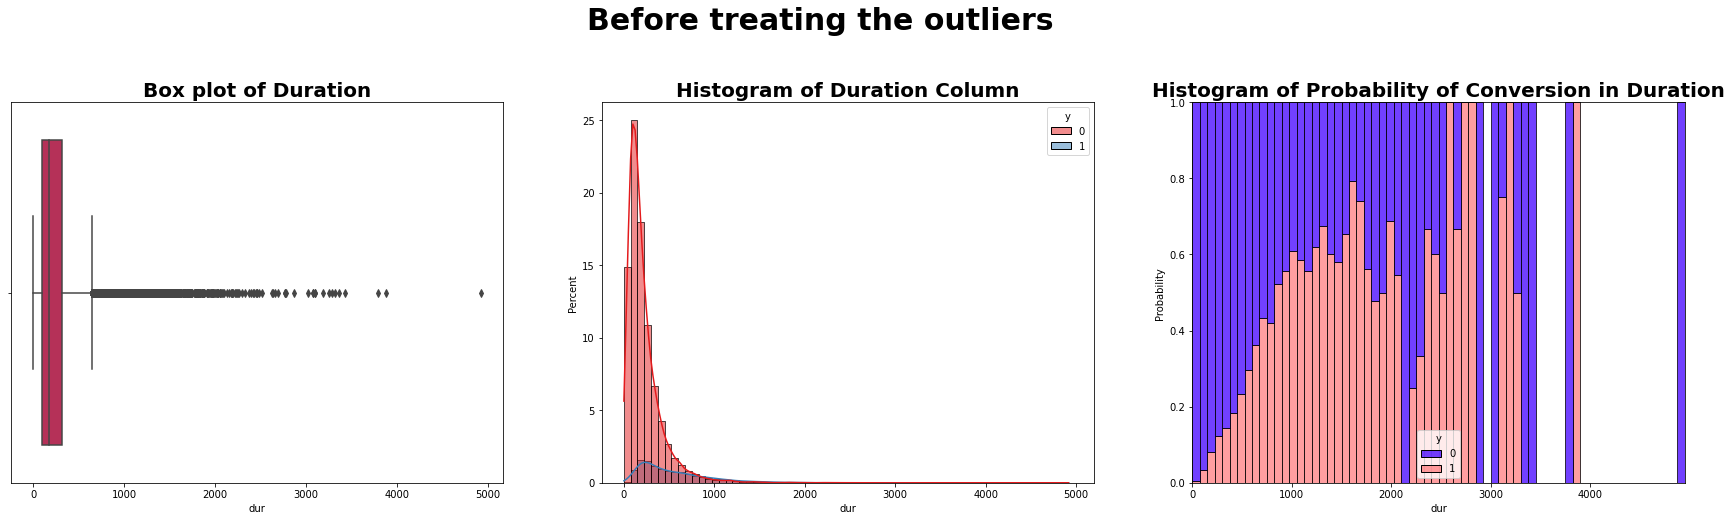

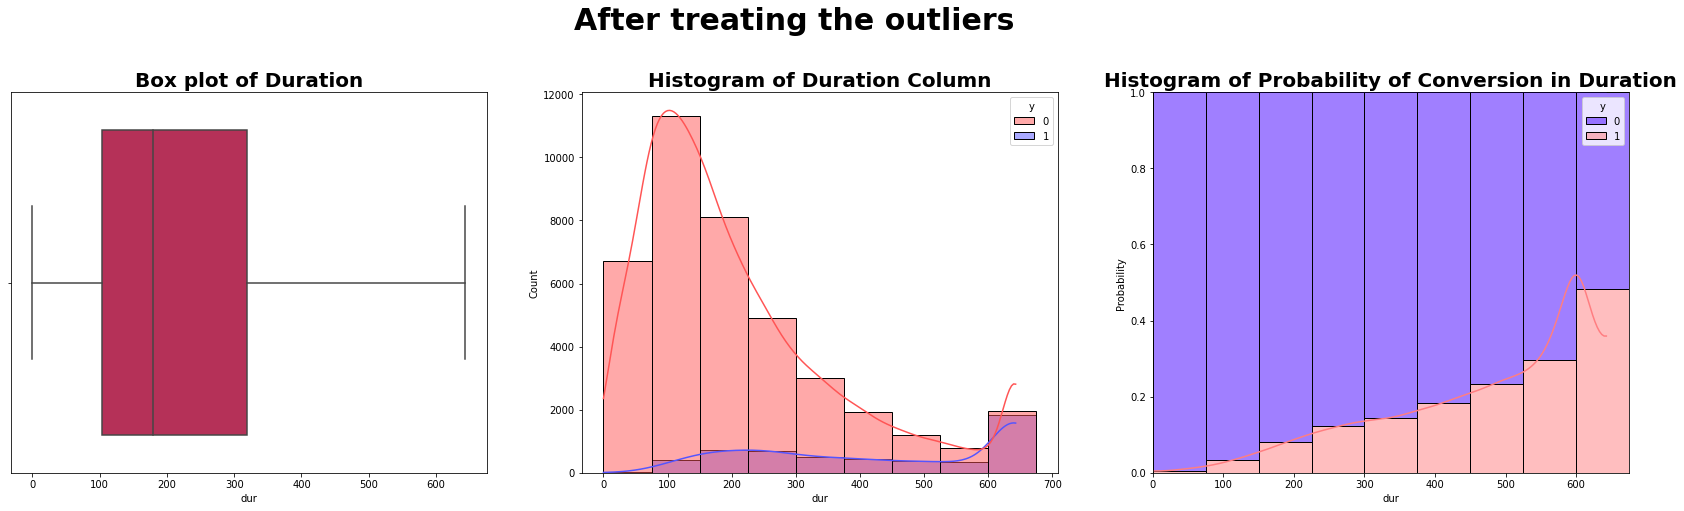

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='dur',palette='rocket',ax=axes[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='Set1',binwidth=75,kde=True,ax=axes[1],stat='percent').set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=False,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )

data['dur'] = data['dur'].clip(-221,643) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(29,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='dur',palette='rocket',ax=axes2[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='seismic_r',binwidth=75,kde=True,ax=axes2[1]).set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )



From the plots it is evident that as the duration increases the probability of conversion is increasing. 

## 9. Number of Calls column

In [ ]:
data.num_calls.isnull().sum()

0

<Axes: xlabel='num_calls'>

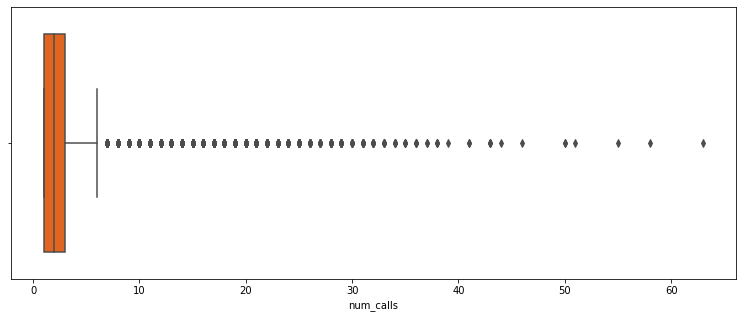

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='num_calls',palette='hot')

In [ ]:
l,m,n=outlier('num_calls')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(l,m,n))

U.Threshold:  6.0 
L.Threshold:  -2.0
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  11
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  12
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  13
Outlier detected!:  11
Outlier de

1. Total number of outliers = 3064
2. Upper threshold = 6
3. Lower threshold = -2
4. Max. value in the column = 63

In [ ]:
num_calls_outliers_converted=data.query('num_calls>6 & y==1')
num_calls_outliers_converted.sample(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
31133,29.0,management,single,tertiary,cellular,18,feb,264,7,unknown,1
30917,28.0,technician,single,tertiary,cellular,9,feb,253,21,unknown,1
18195,36.0,housemaid,married,primary,telephone,30,jul,643,9,unknown,1


In [ ]:
conversion_rate_in_numcalls_outliers=(num_calls_outliers_converted.shape[0]*100/3064)
conversion_rate_in_numcalls_outliers

5.254569190600522

The conversion rate with number of calls is 5.25% only

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Number of Calls')

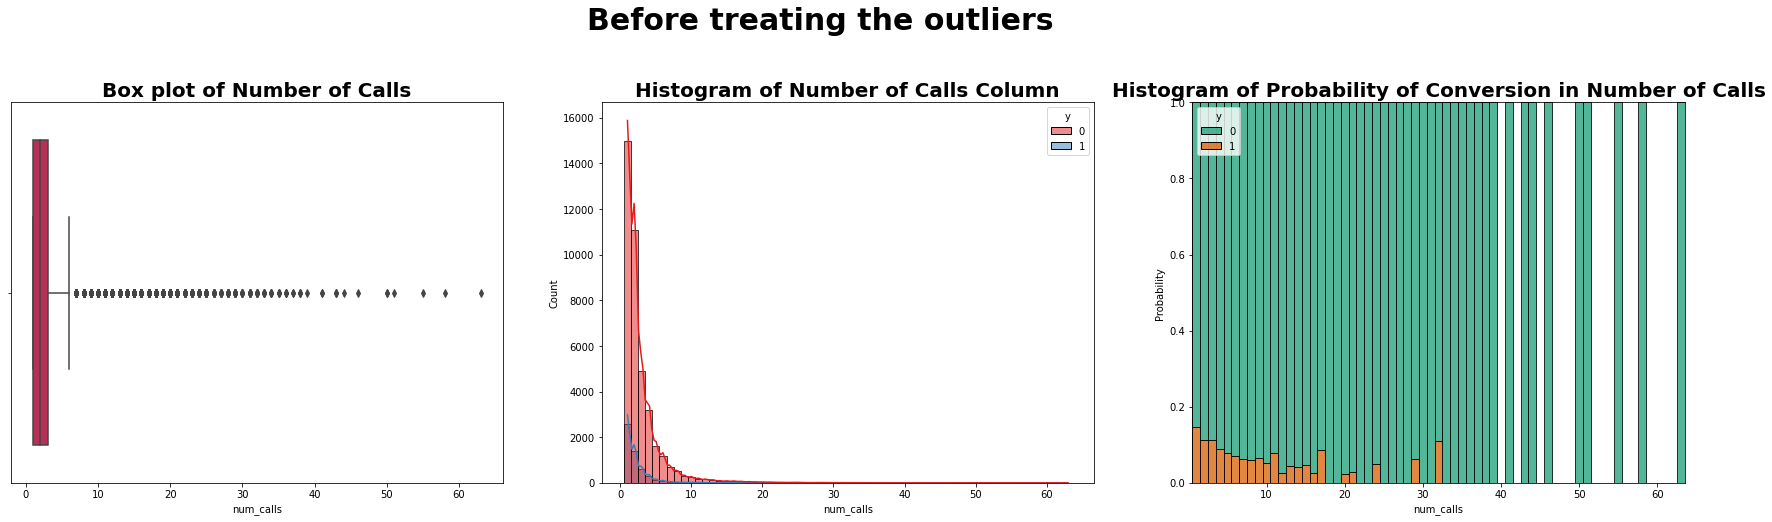

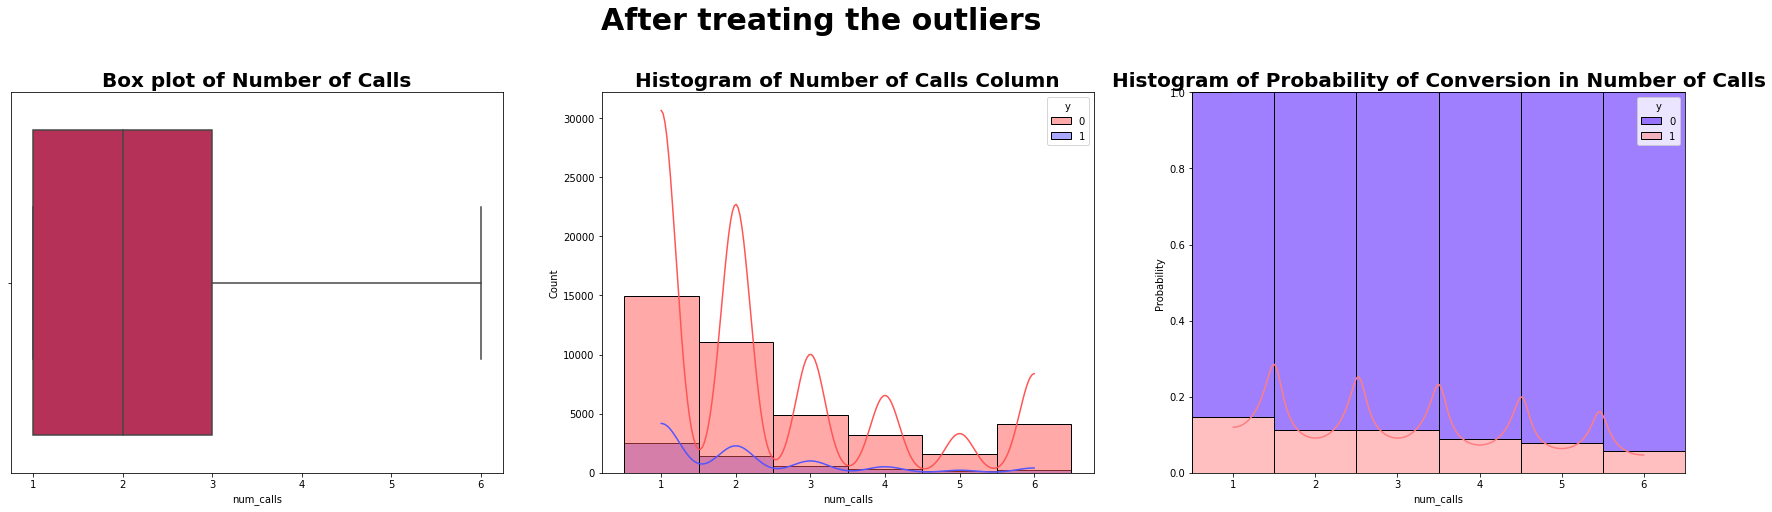

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Set1',binwidth=3,kde=True,ax=axes[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Dark2',binwidth=3,kde=False,ax=axes[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20 )

data['num_calls'] = data['num_calls'].clip(-2,6) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes2[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='seismic_r',binwidth=1,kde=True,ax=axes2[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='gnuplot2',binwidth=1,kde=True,ax=axes2[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20)



As the number of calls are increasing the probability of conversion is decreasing!!

## Methods to Plot

In [ ]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_multi_variate_target(data,target,cat_cols):

  two_cat_combis=list(combinations(cat_cols,2))
  palette=['crest','cubehelix','flare','afmhot',
           'gist_earth','gist_heat','afmhot_r', 
           'gist_ncar','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set2','Set3']

  for x in two_cat_combis:

    num=random.randint(len(palette))
    
    table=data.pivot_table(index=x[0],columns=x[1],values=target)
    table=table.apply(lambda x : x*100)

    plt.figure(figsize=(17,8))
    fig=sns.heatmap(data=table,annot=True,cmap=palette[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)

    title_string="Heatmap showing Rate of Conversion with {} & {} in percentages"
    plt.title(title_string.format(x[0],x[1]),fontsize=20,fontweight='bold',pad=25)
   
    plt.xlabel(x[1],fontsize=15,fontweight='bold',labelpad=5)
    plt.xticks(fontsize=13,rotation=45,ha='right')[1:-1]
    plt.ylabel(x[0],fontsize=15,fontweight='bold',labelpad=20)
    plt.yticks(fontsize=13)
    print(palette[num])

In [ ]:
# from itertools import combinations

# cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
# two=list(combinations(cat_cols,2))
# xx=two[0]
# xx[1]
# title_string="Heatmap showing Rate of Conversion with various {} & {} in percentages "
# print(title_string.format(xx[0],xx[1]))

In [ ]:
def categorical_Bi_variate_target(data,target,cat_cols):

  colours=['Accent','BrBG','PRGn','PiYG','PuOr','RdBu','RdGy','RdPu_r','RdYlBu','RdYlGn','viridis',
           'Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in  cat_cols:

    num=random.randint(len(colours))
    seperate=[0.03 for j in range(len(data[x].unique()))]

    table=pd.pivot_table(data=data,values='y',index=x).sort_values(by='y')
    table['y']=table['y']*100 

    fig,axes=plt.subplots(1,2,figsize=(15,7))
    title="Percentage of Conversion in {} "
    plt.suptitle(title.format(x),fontweight='bold',fontsize=20)

    table.plot(kind='barh',ax=axes[0],legend=None,cmap=colours[num])
    table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colours[num],explode=seperate)
    plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')
    # print(colours[num])



In [ ]:
cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_Bi_variate_heatmap(data,target,cat_cols):
  colours=['Accent','Accent_r','BrBG','BrBG_r','PRGn','PRGn_r','PiYG','PiYG_r','PuBu','PuBuGn','rainbow','rocket','viridis','CMRmap',
           'PuBuGn_r','PuBu_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
           'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in cat_cols:

    num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values='y',index=x)
    table['y']=table['y']*100 

    plt.figure(figsize=(15,7))
    sns.heatmap(data=table,annot=True,cmap=colours[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
    plt.title("Heatmap showing Rate of Conversion in {} in Percentages".format(x),fontsize=20,fontweight='bold',pad=25)
    plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
    plt.ylabel(x,fontsize=12,labelpad=20,fontweight='bold',color='green')
    plt.xticks([])
    print(colours[num])


In [ ]:
cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_Bi_variate_comparision(data,target,cat_cols):

  for x in cat_cols:

    # num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values=target,index=x)
    table[target]=table[target]*100

    fig,axes=plt.subplots(1,2,figsize=(20,7))
    plt.suptitle("Comparing the Count Plot with Percentage of Conversion in various categories of {}".format(x),fontweight='bold',fontsize=20,y=1.02)

    sns.countplot(data=data,y=x,ax=axes[0]).set_title("Count Plot of {} column".format(x),fontsize=15,fontweight='bold')
    table.plot(kind='barh',ax=axes[1],legend=None,cmap='Spectral').set_title("Percentage of Conversion in {} column".format(x),fontsize=15,fontweight='bold')
    plt.xlabel("Percentage")


In [ ]:
def categorical_uni_variation(data,target,cat_cols):

  palette=['crest','cubehelix','flare','afmhot','gist_earth','gist_heat','afmhot_r', 
           'gist_ncar','gist_rainbow','gist_stern','CMRmap','gnuplot','viridis',
           'rocket','magma','mako','flare','autumn','icefire','seismic_r',
           'vlag','cividis','icefire','Spectral','Set1','Set2','Set3',]         

  for x in cat_cols:

    num=random.randint(len(palette))

    plt.figure(figsize=(13,6))
    sns.countplot(data=data,x=x,hue=target,palette=palette[num])
    plt.xlabel(x,fontsize=12,labelpad=20,fontweight='bold')
    print(palette[num])


In [ ]:
from itertools import combinations

cont_cols=['age','dur','day','num_calls']

two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

## Uni-Variate Analysis in Categorical Coulmns

gist_heat
afmhot_r
gnuplot
rocket
afmhot
viridis


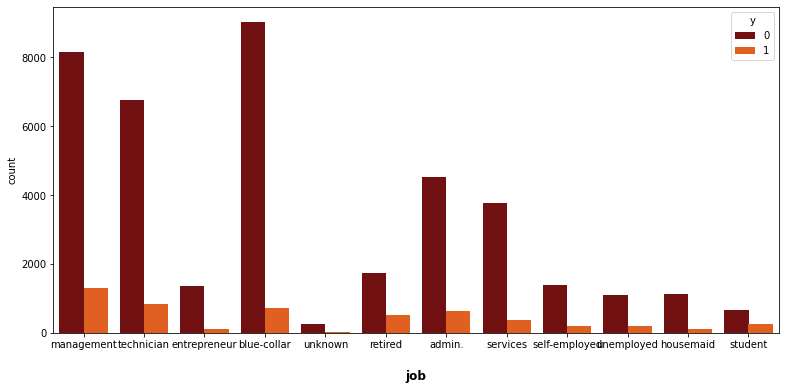

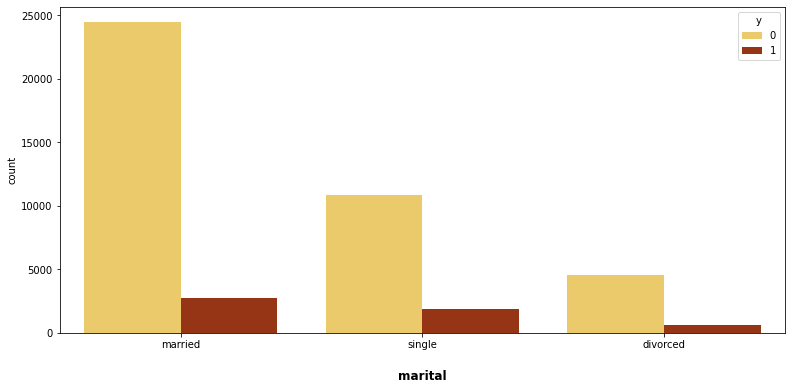

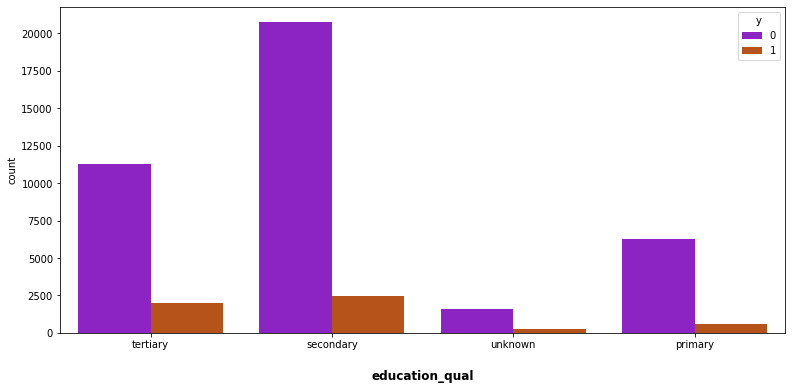

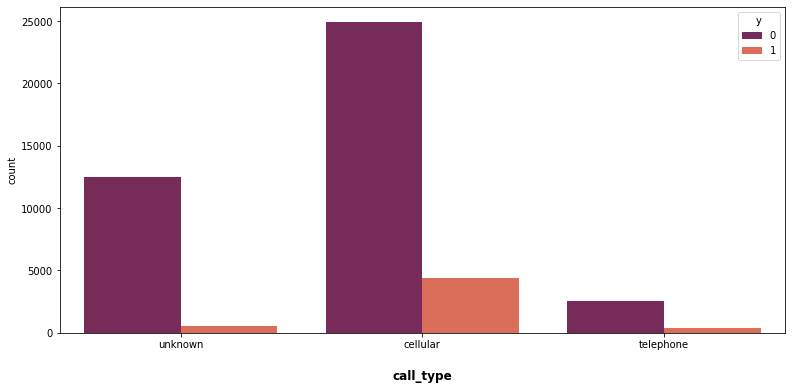

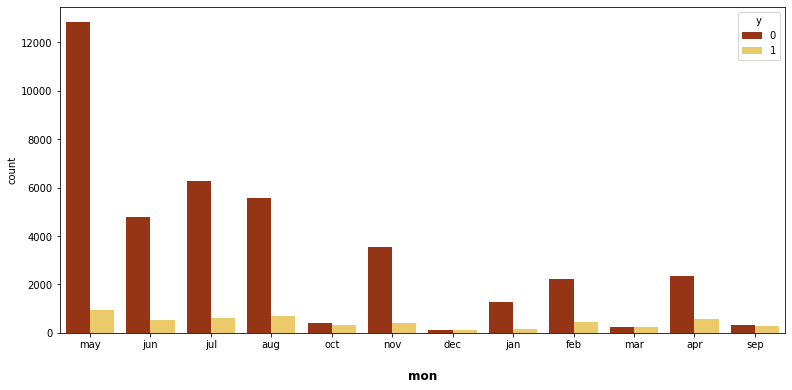

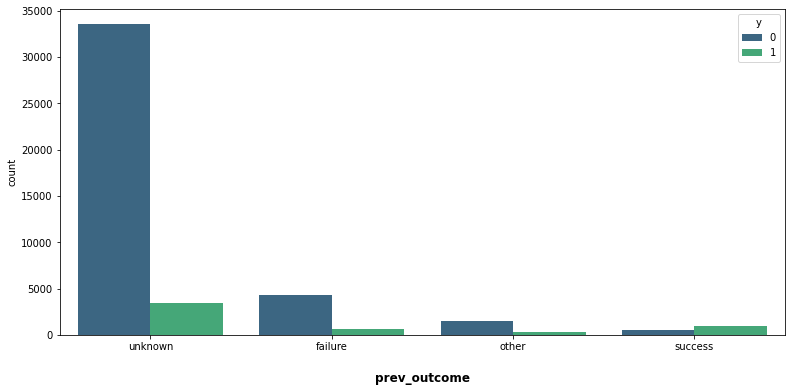

In [ ]:
categorical_uni_variation(data,target,cat_cols)


## Bi-Variate Analysis in Categorical Columns

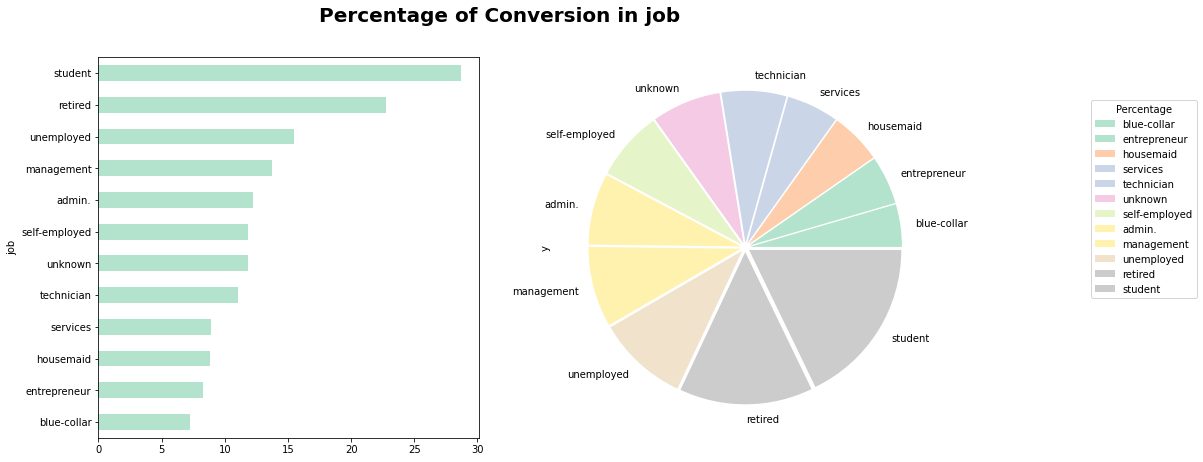

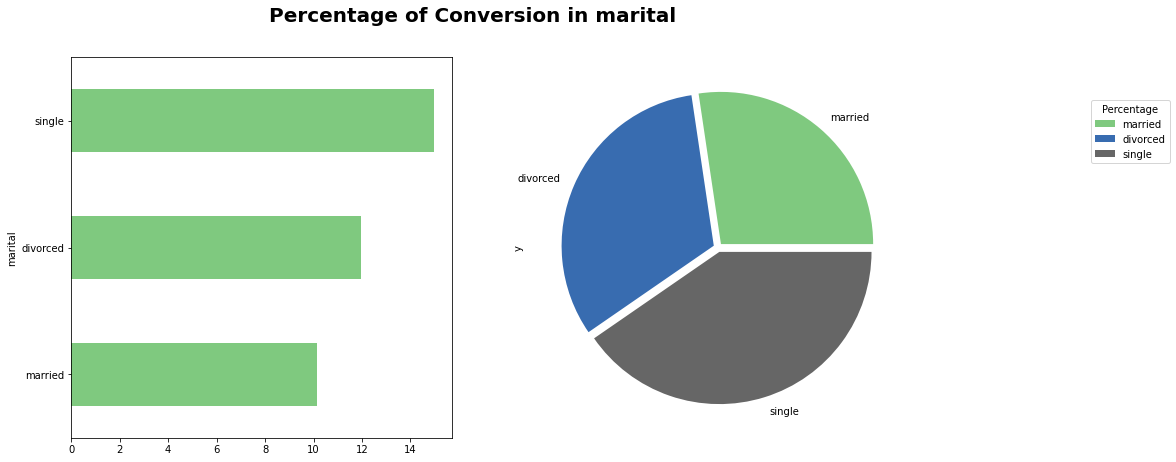

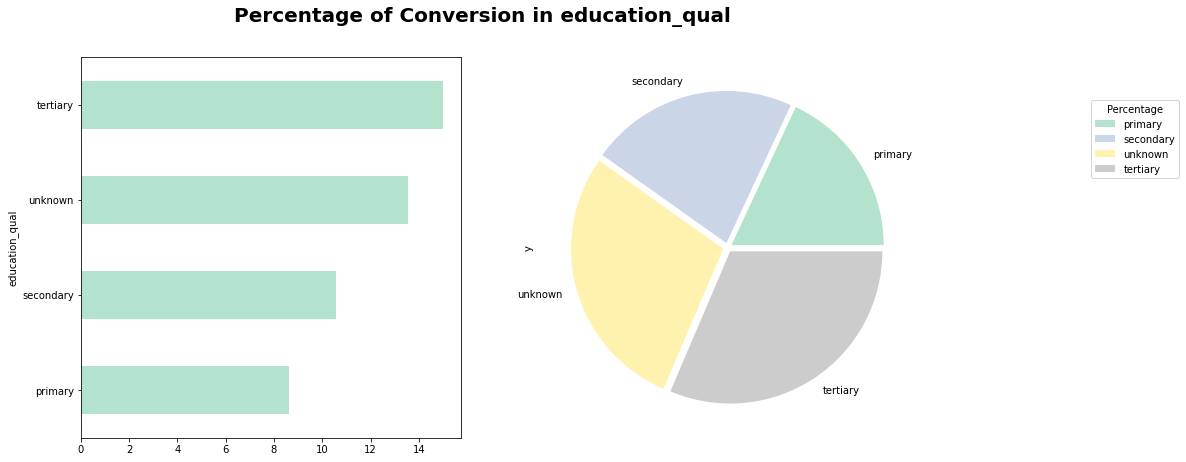

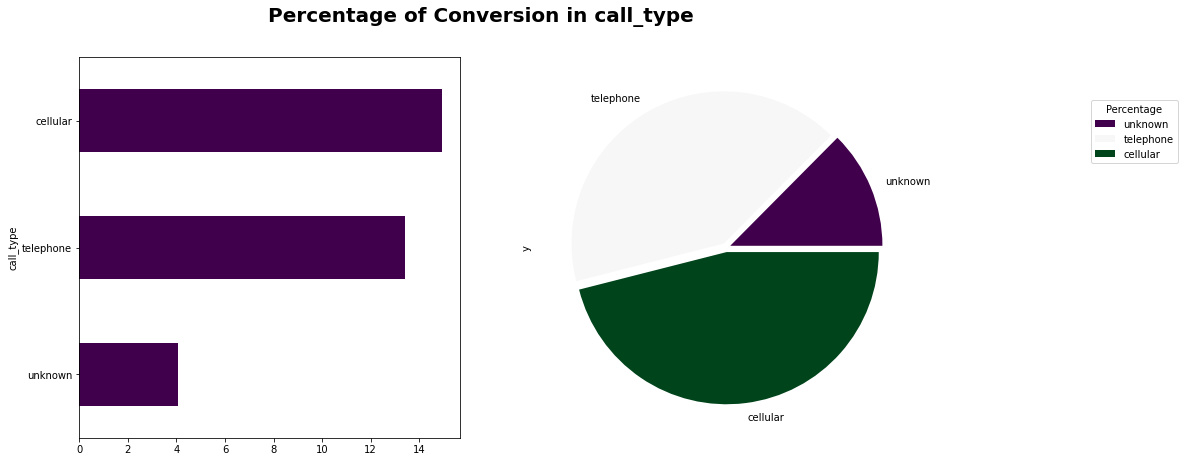

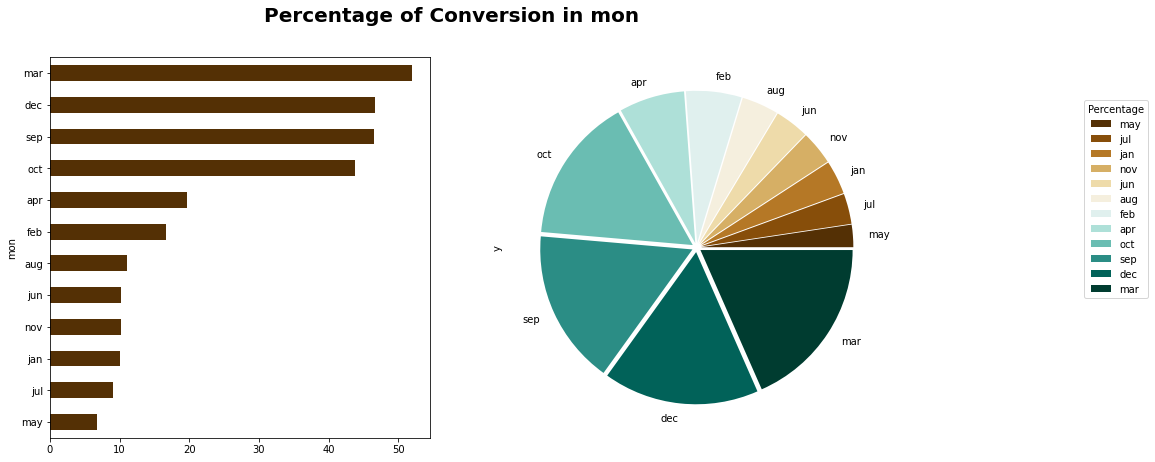

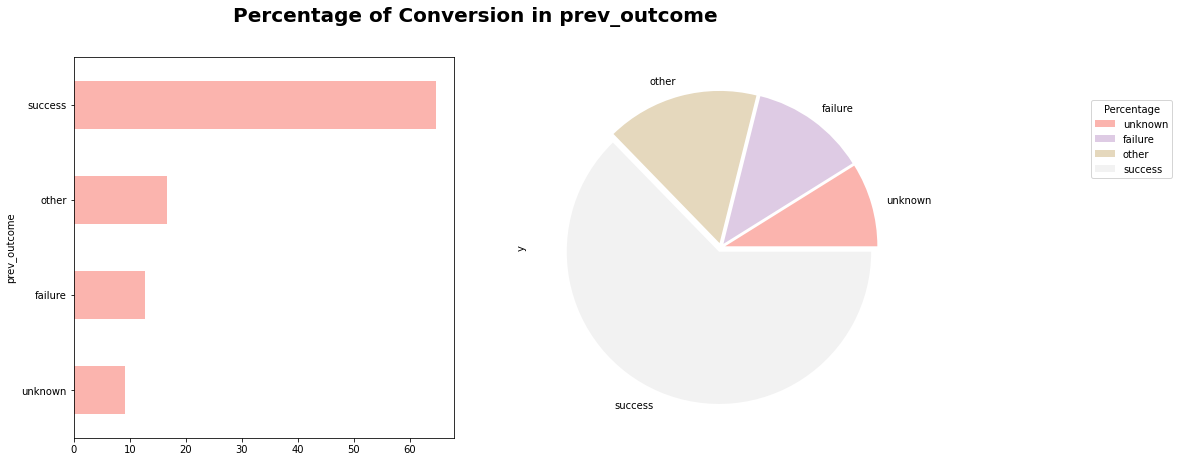

In [ ]:
categorical_Bi_variate_target(data,target,cat_cols)


Set2
flare
PiYG_r
PuOr
icefire
PRGn_r


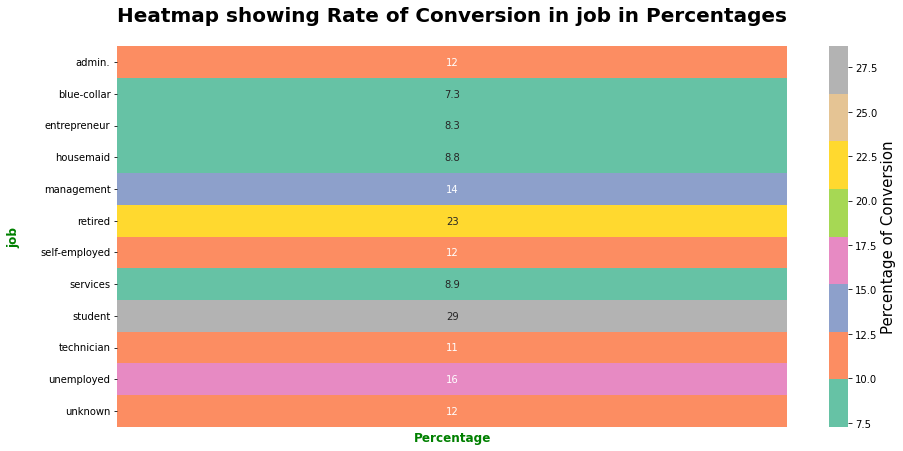

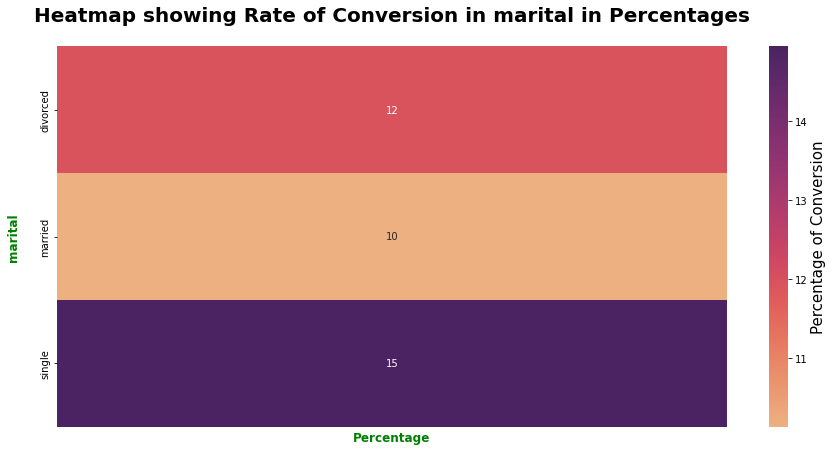

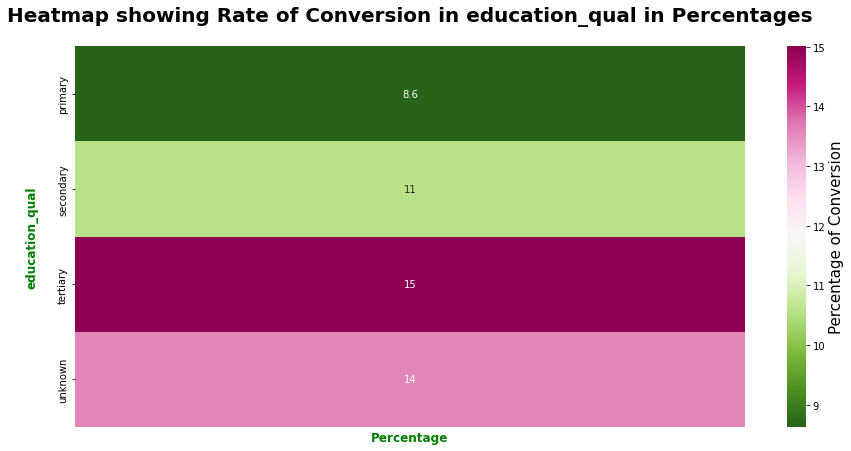

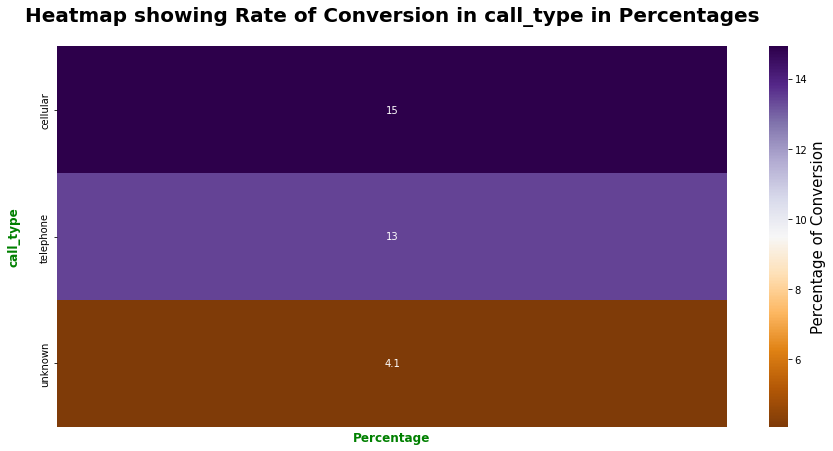

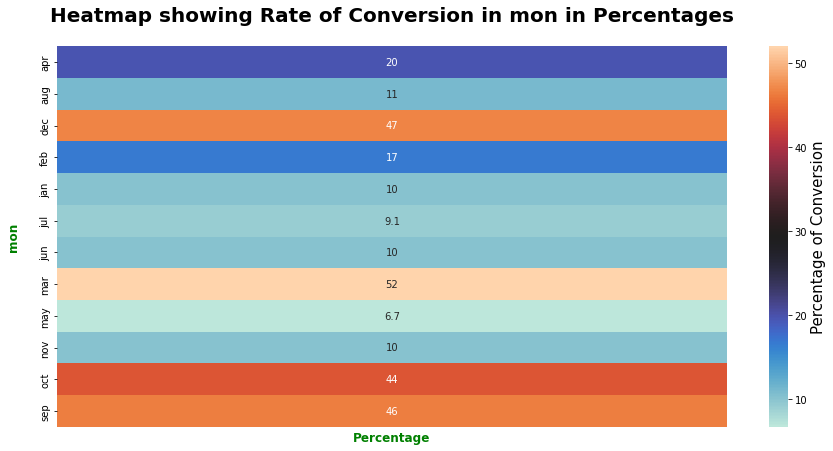

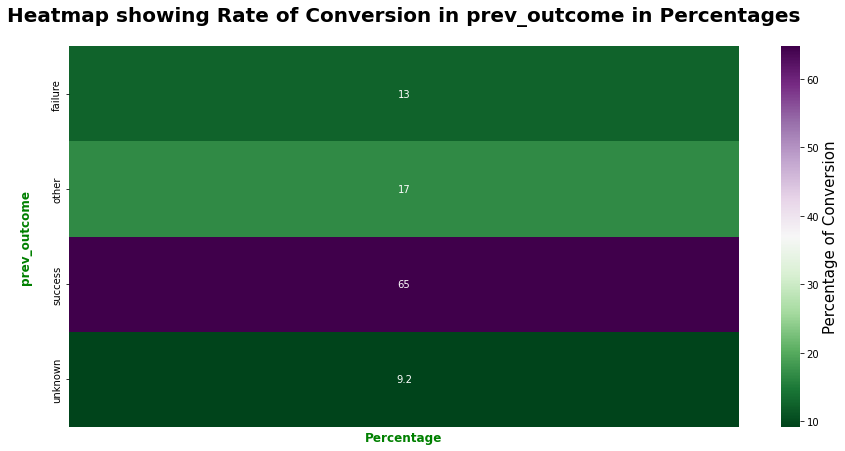

In [ ]:
categorical_Bi_variate_heatmap(data,target,cat_cols)


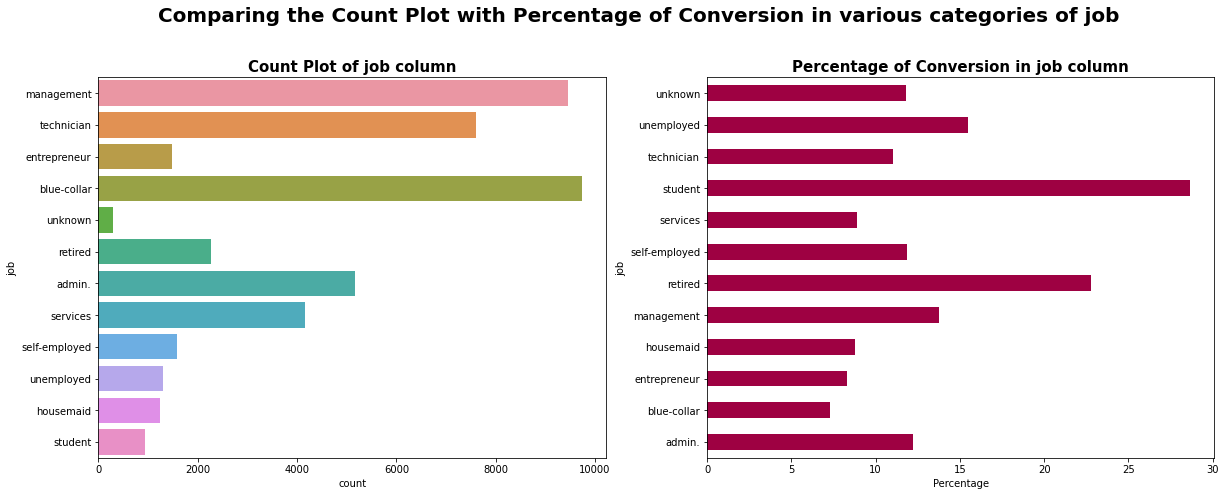

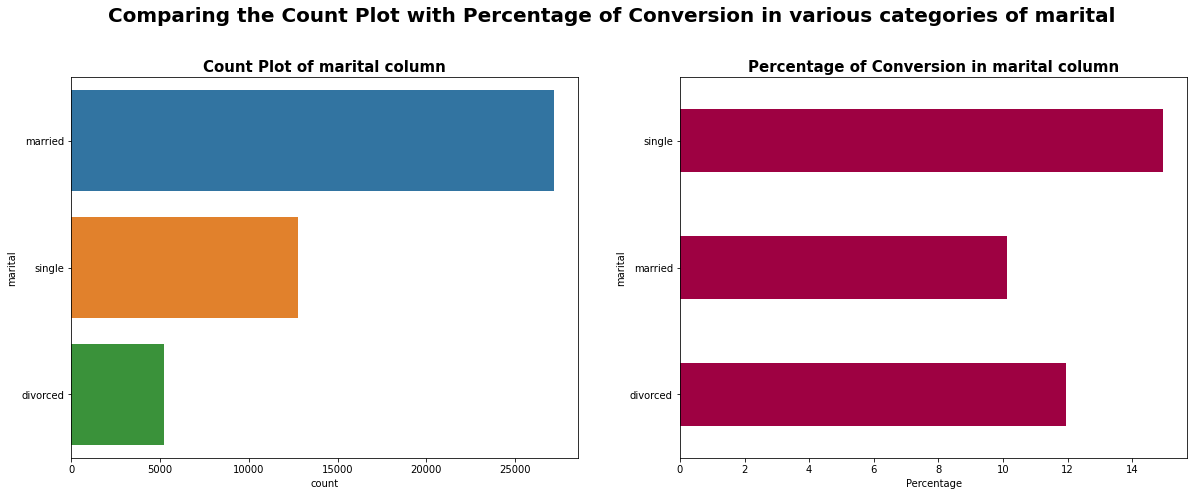

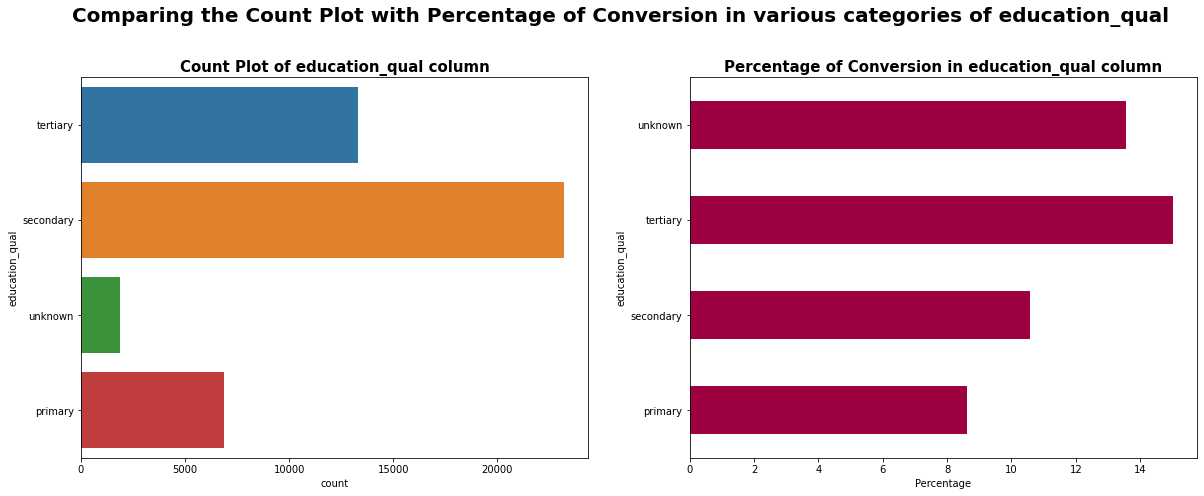

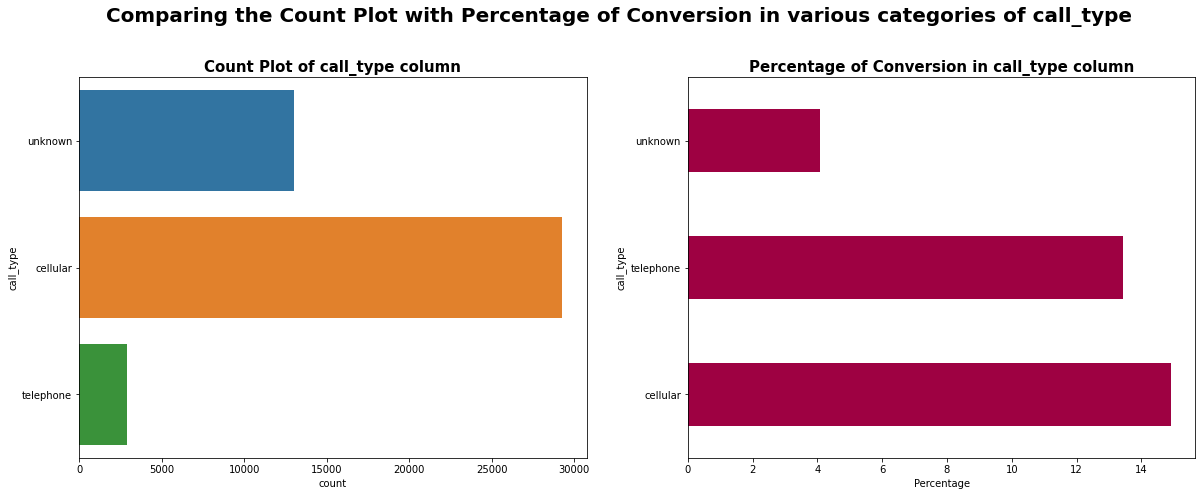

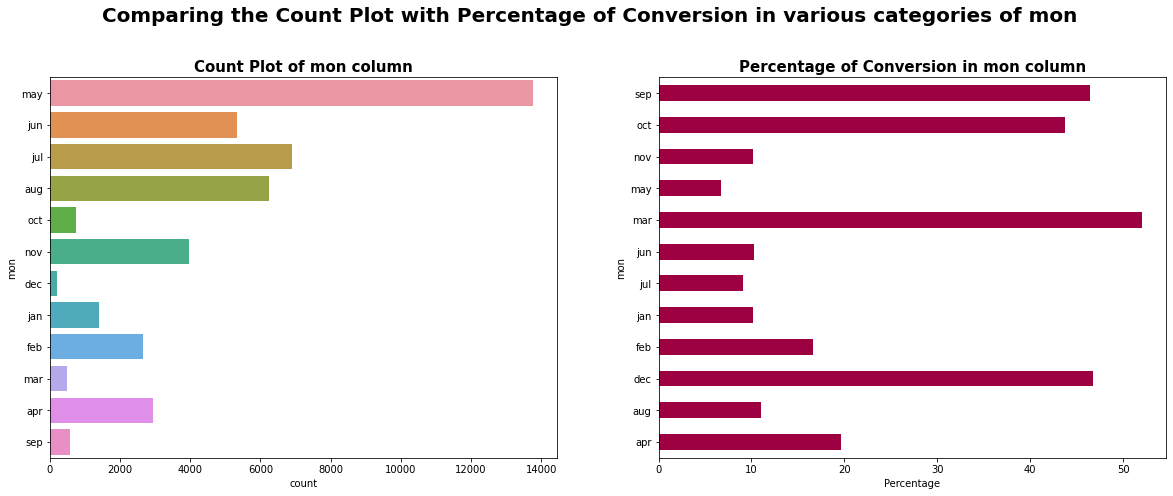

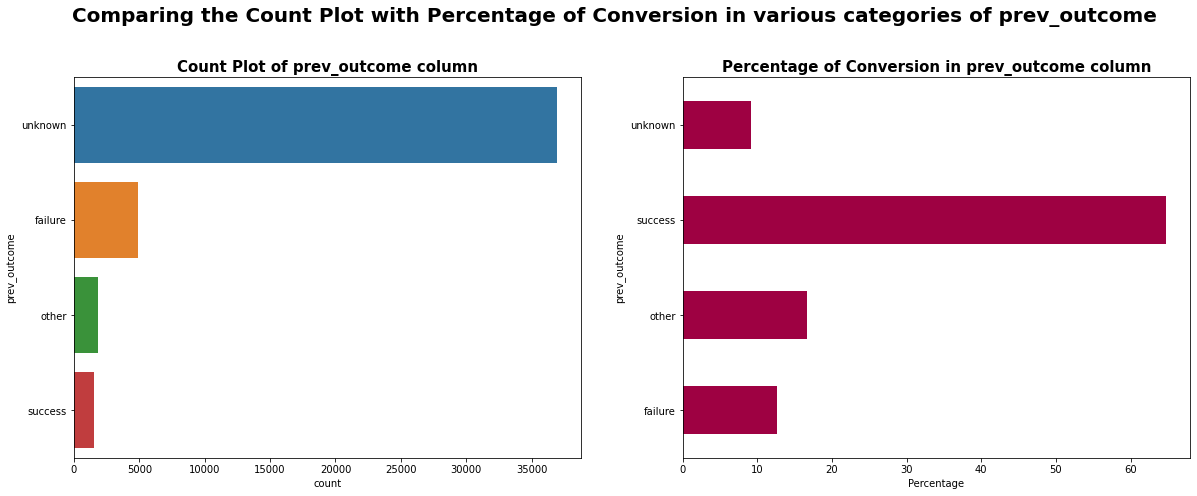

In [ ]:
categorical_Bi_variate_comparision(data,'y',cat_cols)



### **Inference from Bi-variate analysis of categorical columns:**
1.   **Job column:** Students and retired people have more conversion rate. But the business firm has contacted blue-collared people more where the conversion rate is the poorest among the all categories (This may be the reason that they are less educated and might have receiving the benefits of health schemes by the Government). Hence it is recommended to reach students, retired, unemployed and management people having conversion rates of 29%,23%,16% and 14% respectively, rather than reaching blue-collared people.

2.   **Marital column:** Singles have the highest rate of conversion 14.95%, where as married people has lowest conversion rate 10.12%. Therefore it is recommended to reach sinlges rather than married.

3.   **Education Qualification column:** Tertiary category has the highest rate of conversion 15%, secondary category have 10.56% and the lowest is 8.62% for primary. Therefore contacting the higher educated people will result in more success in converting them to subscribe to a policy.

4.  **Call type column:** Cellular has the highest rate of conversion 14.9%. Also the firm contacting more to Cellular type.

5.   **Month column:** March has highest rate of conversion 51.99%, this is in line with our genreal knowledge that in India the financial year closes in March, so many employees purchase policies for tax benifit. Rather than approaching the customers in the month of May(only 6.71% of conversion rate) it is recomended to approach them in March, followed by December(46.7%),September(46.4%) and October(43.7%).

6.   **Previous Outcome column:** If the previous outcome of the call is 'success' the conversion rate of that call is 64.7%! Ofcourse the word itself means that only. Also the firm has some scope here to do some research, why though the previous outcome of the call is success, some people aren't purchasing the policy. Chasing such type of customers once again may result in full success of converting them to purchase a policy.








## Multi-Variate Analysis in Categorical Columns

gist_rainbow_r
crest
flare
gnuplot_r
Set3
gist_stern
flare
seismic_r
CMRmap
autumn
Set1
crest
gist_rainbow_r
cubehelix
flare


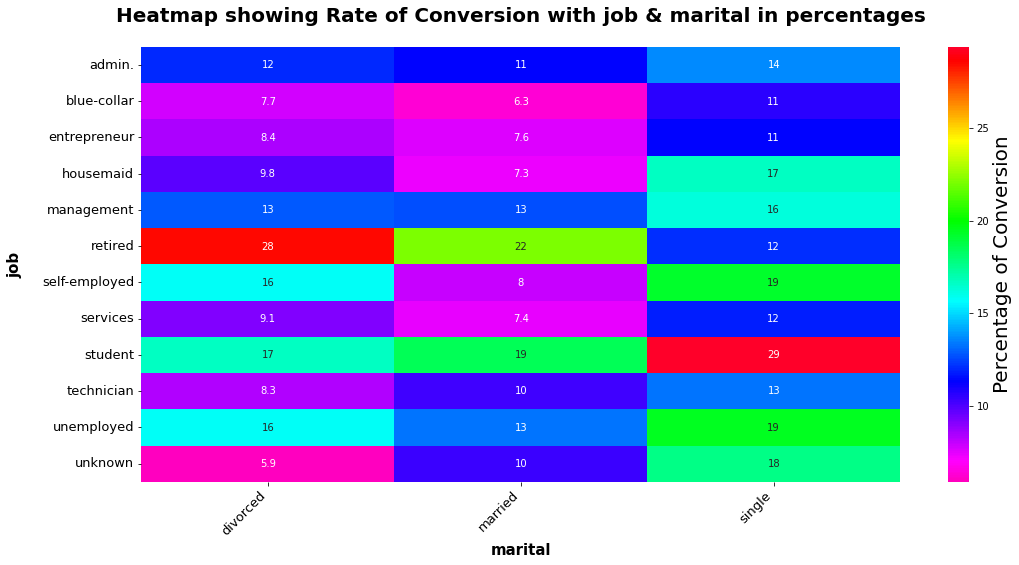

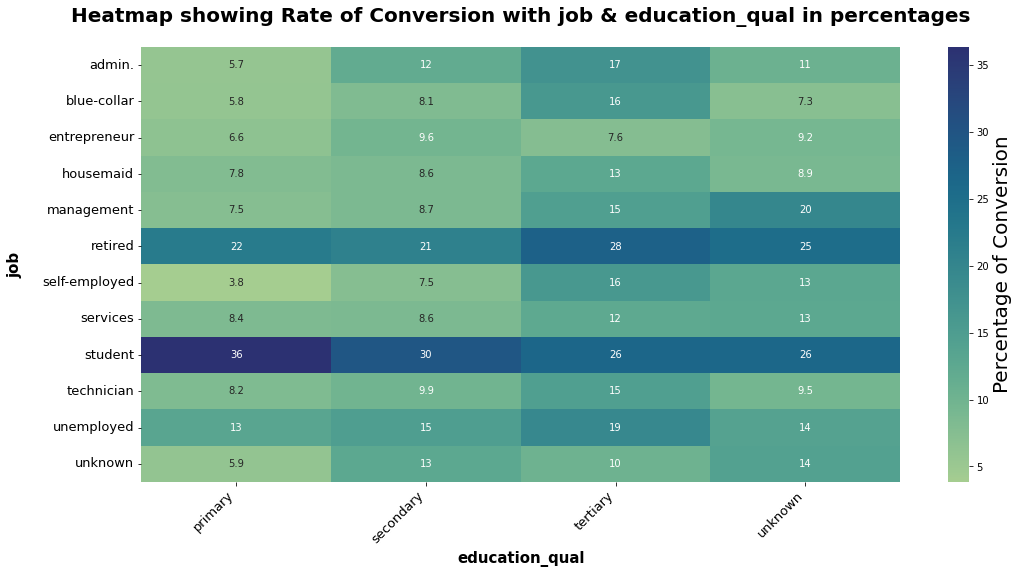

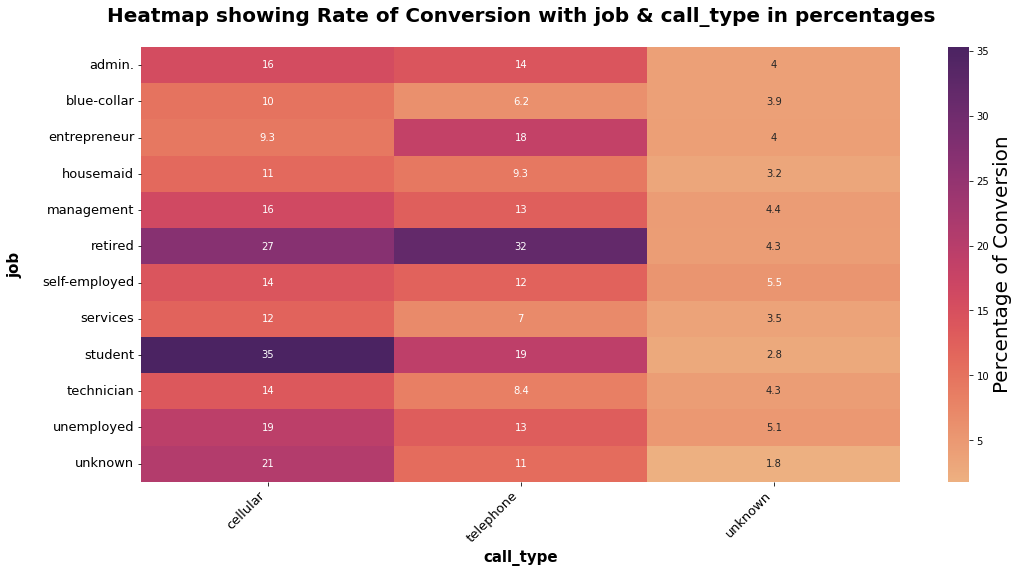

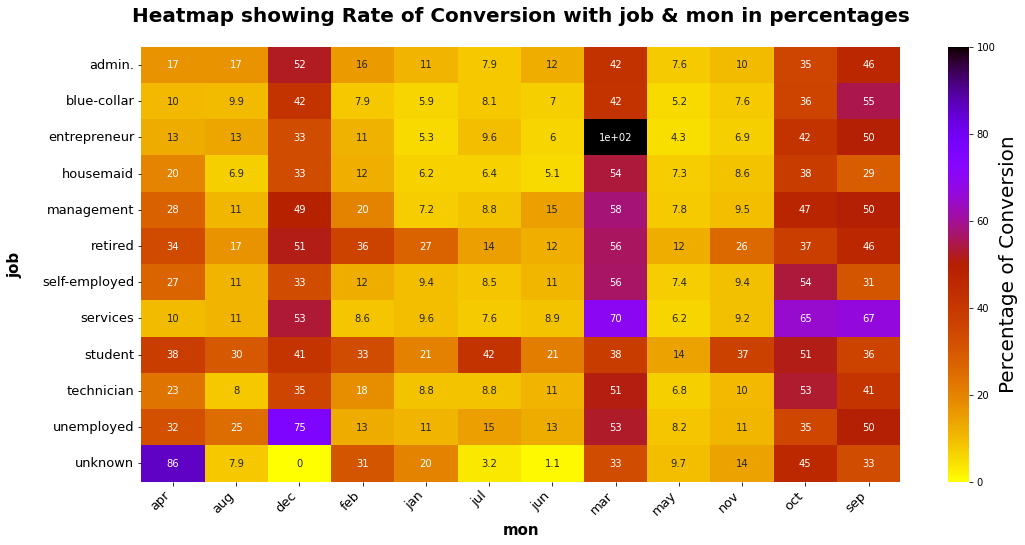

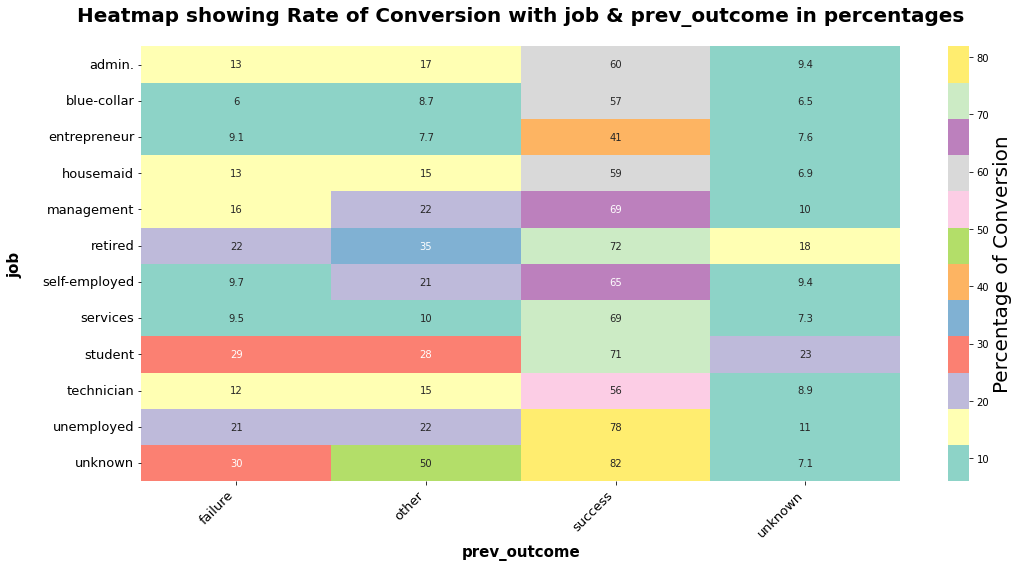

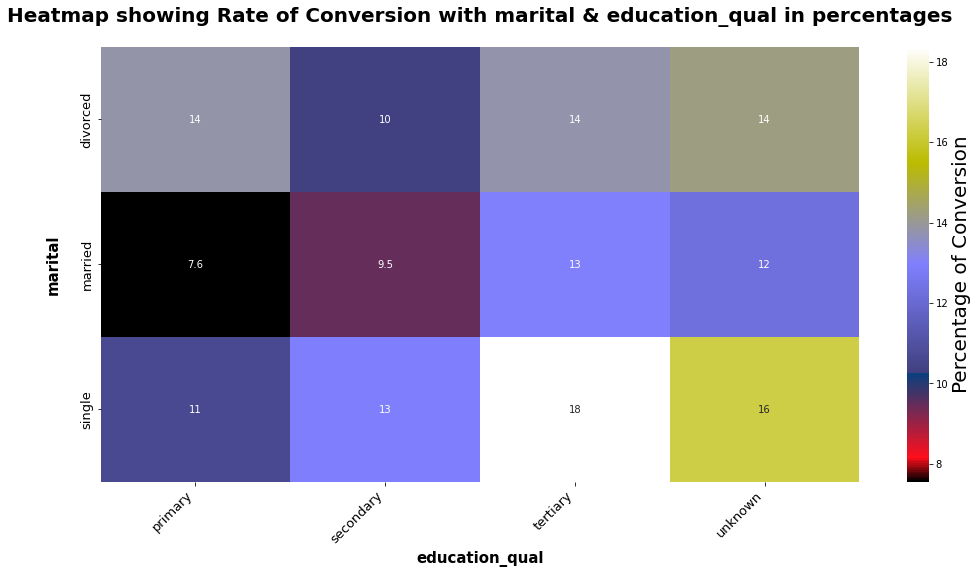

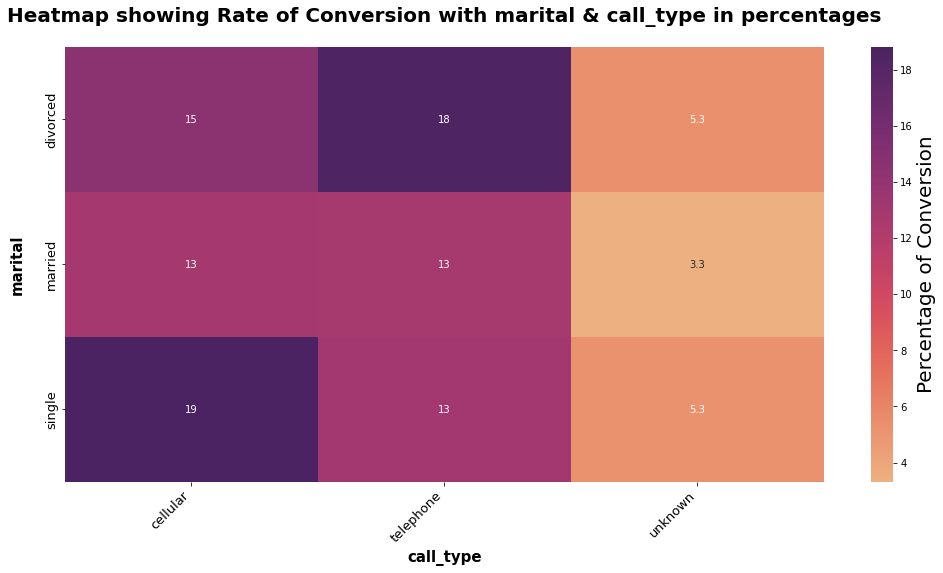

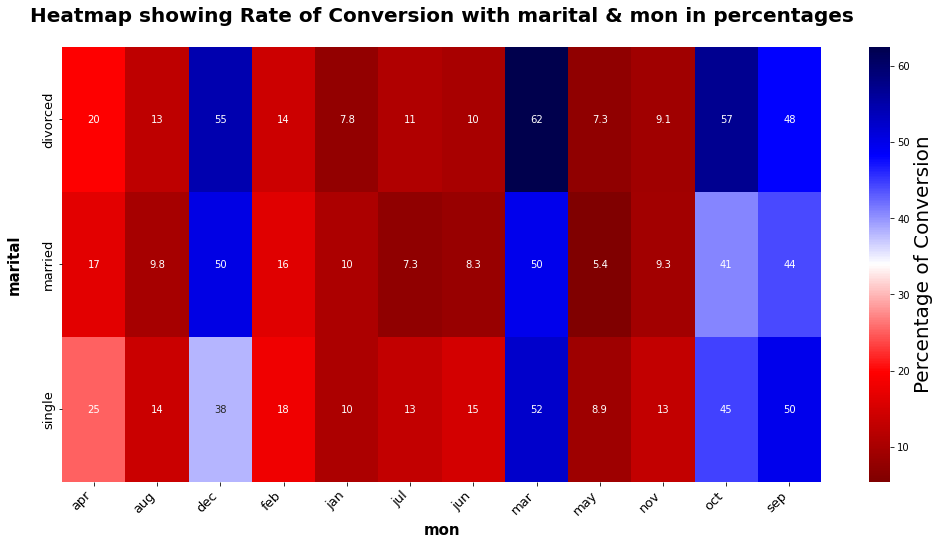

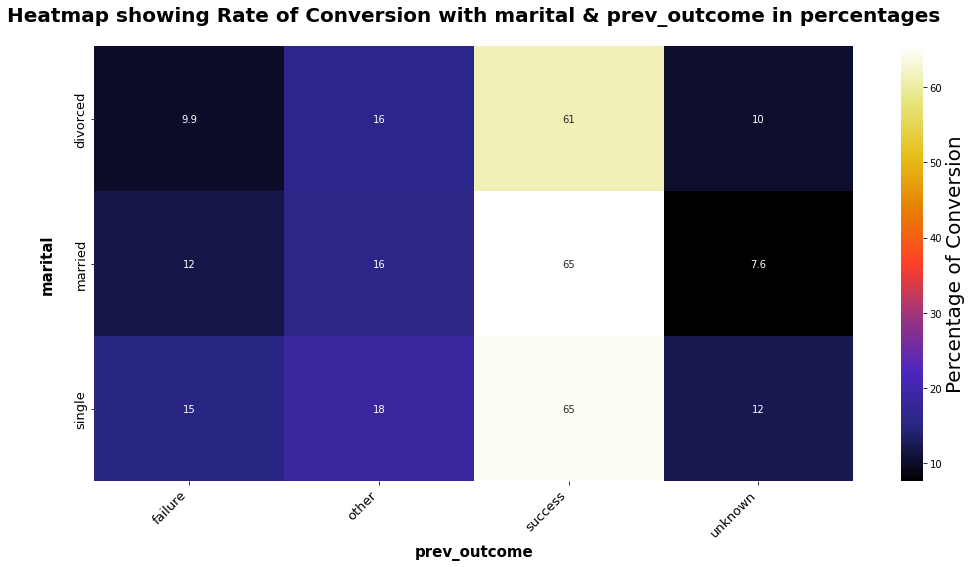

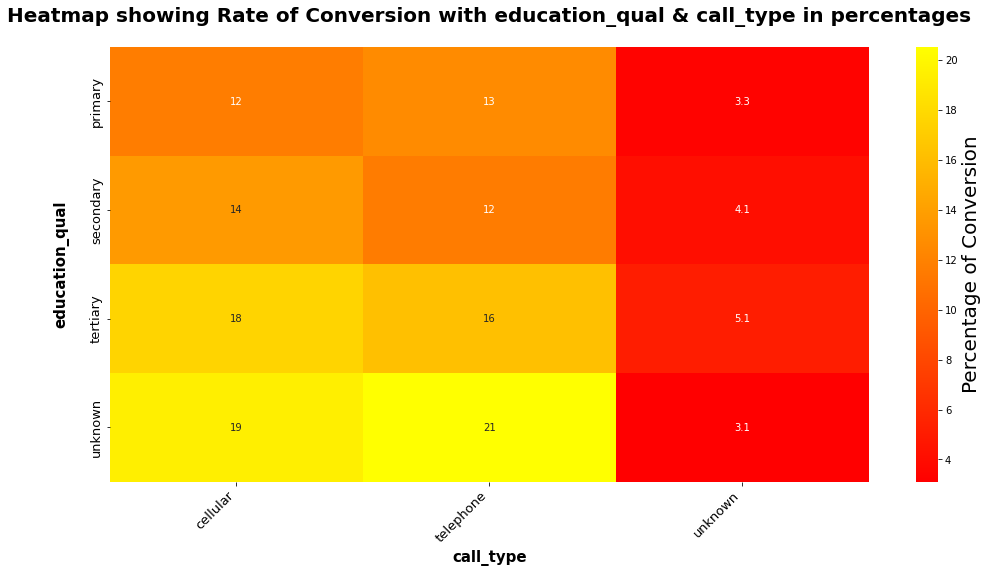

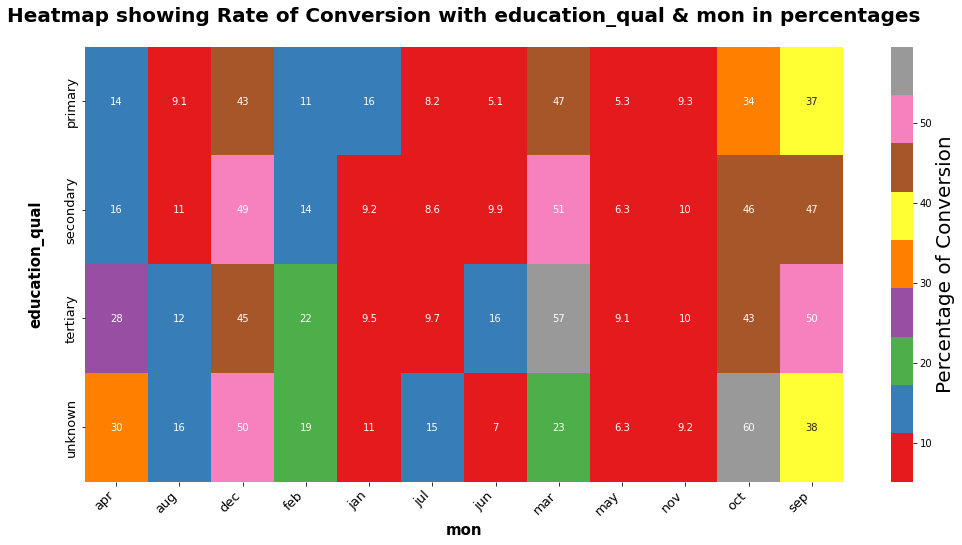

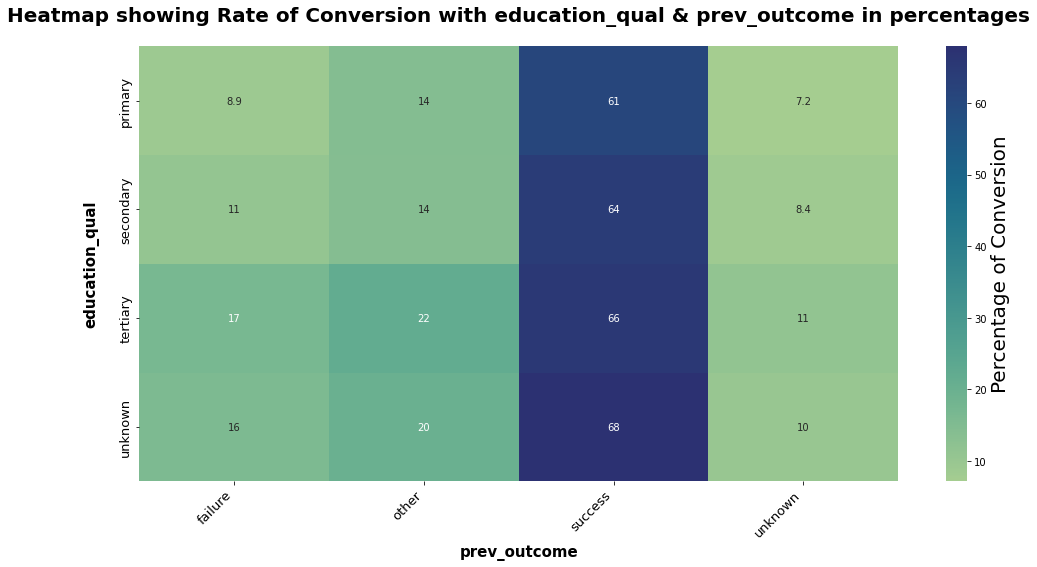

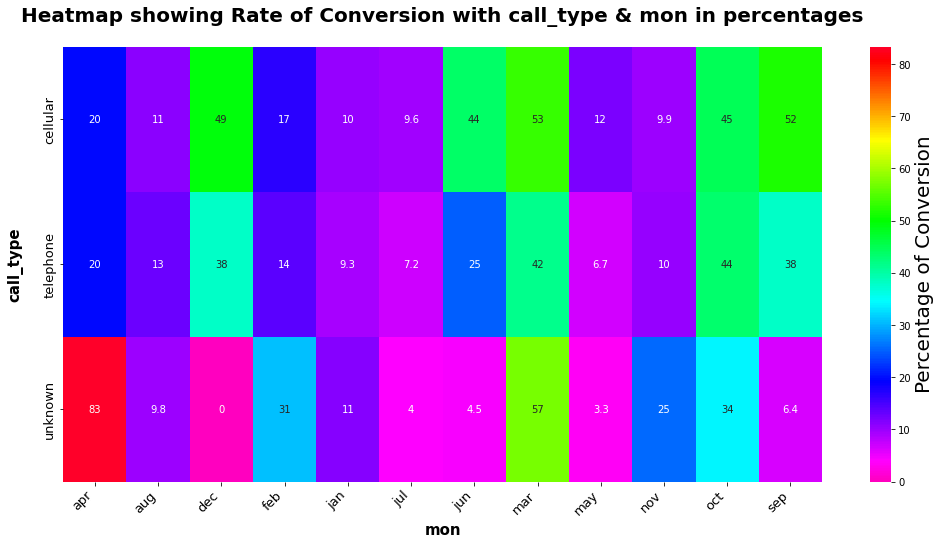

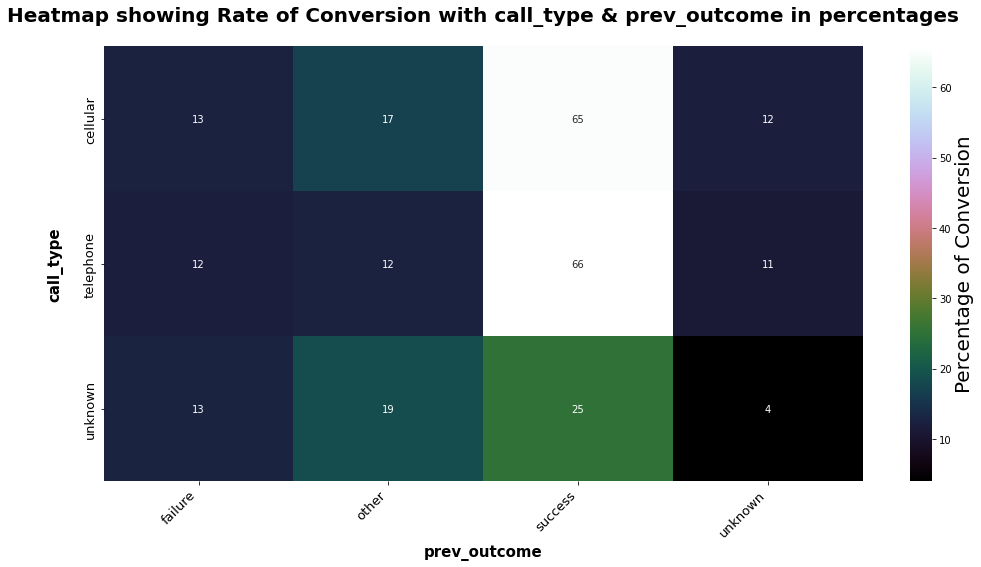

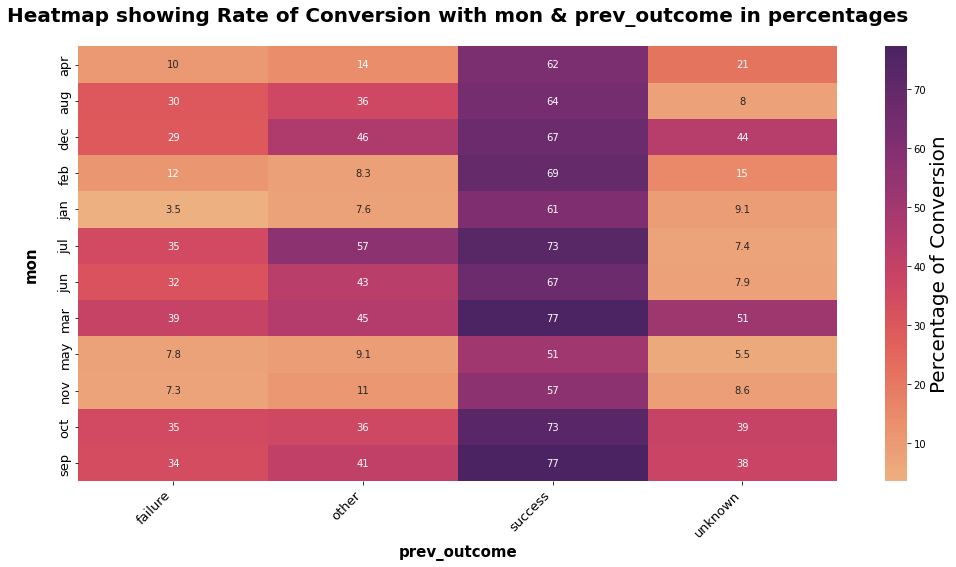

In [ ]:
categorical_multi_variate_target(data,target,cat_cols)


## Multi-Variate analysis in Continuous coulumns

In [ ]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['y','job','marital','education_qual','call_type','mon','prev_outcome']
cont_cols=['age','dur','day','num_calls']
two_cont_combis=list(combinations(cont_cols,2))

palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']

for category in cat_cols:
  for combo in two_cont_combis:
    num=np.random.randint(len(palette))
    figure=sns.jointplot(data=data,x=combo[0],y=combo[1],kind='kde',hue=category,shade=True,height=9,palette=palette[num])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

# **Encoding**



## Job column




In [ ]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data['job']=data.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})

## Marital column

In [ ]:
data['marital']=data.marital.map({'married':0,'divorced':1,'single':2})   # Label Encoding

In [ ]:
# data= pd.get_dummies(data, columns=["marital"])   # One-Hot Encoding
# data.head()

## Education Qualification

In [ ]:
data['education_qual']=data.education_qual.map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})

## Call type

In [ ]:
data['call_type']=data.call_type.map({'unknown':0,'telephone':1,'cellular':2})

## Month column

In [ ]:
data['mon']=data.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

## Previous outcome

In [ ]:
data['prev_outcome']=data.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})   # Label Encoding
data['prev_outcome']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    3
45209    0
45210    2
Name: prev_outcome, Length: 45205, dtype: int64

In [ ]:
# data= pd.get_dummies(data, columns=['prev_outcome'])        # One-Hot Encoding
# data.head()

## **Target and Feature Selection**

In [ ]:
# x= data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
#        'dur', 'num_calls','marital_divorced', 'marital_married',
#        'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
#        'prev_outcome_success', 'prev_outcome_unknown']]
# y = data['y']
     

In [ ]:
features=['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']
target=['y']

x=data[features]
y=data[target]

# **Splitting & Balancing**

###**Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# features=['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']
# target=['y']

# x=data[features]
# y=data[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=38,)

In [ ]:
x_train.shape

(36164, 10)

In [ ]:
y_train.shape

(36164, 1)

### **Balancing**

---



In [ ]:
#@title *Random Undersampling*
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

rus = RandomUnderSampler() 
x_rus, y_rus = rus.fit_resample(x_train, y_train) 

log_reg_1 = LogisticRegression()
log_reg_1.fit(x_rus,y_rus)
log_reg_1.score(x_rus,y_rus)

0.8160009454029781

In [ ]:
#@title *Random Oversampling*
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

ros = RandomOverSampler() 
x_ros, y_ros = ros.fit_resample(x_train, y_train) #Fit the model
     
log_reg_2 = LogisticRegression()
log_reg_2.fit(x_ros,y_ros)
log_reg_2.score(x_ros,y_ros)

0.8116055491184668

In [ ]:
#@title *SMOTE*
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)

log_reg_3 = LogisticRegression()
log_reg_3.fit(x_sm,y_sm)
log_reg_3.score(x_sm,y_sm)

0.8276391194062569

In [ ]:
#@title *SMOTEENN*

from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smt=SMOTEENN(sampling_strategy="all")
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

log_reg_4 = LogisticRegression()
log_reg_4.fit(x_train_smt,y_train_smt)
log_reg_4.score(x_train_smt,y_train_smt)

0.8750295901087095

In [ ]:
#@title *SMOTE+Tomek*
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smt_Tmk=SMOTETomek(sampling_strategy="all", random_state=42)
x_train_smt,y_train_smt=smt_Tmk.fit_resample(x_train,y_train)

log_reg_5 = LogisticRegression()
log_reg_5.fit(x_train_smt,y_train_smt)
log_reg_5.score(x_train_smt,y_train_smt)

0.8064257407057935

In [ ]:
y_train_smt

In [ ]:
x_train_smt.shape

(63588, 10)

In [ ]:
y_train_smt.shape

(63588, 1)

# **Modeling**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train_smt,y_train_smt)

y_pred=log_reg.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
log_reg.predict_proba(x_test) # Predcting the probabilities of x_test

array([[0.19783778, 0.80216222],
       [0.98582638, 0.01417362],
       [0.52132886, 0.47867114],
       ...,
       [0.99176692, 0.00823308],
       [0.99333552, 0.00666448],
       [0.88875449, 0.11124551]])

In [ ]:
log_reg.coef_

array([[-0.0326803 ,  0.09020102, -0.02021144,  0.01149881, -0.52760877,
         0.16578648, -0.23336558,  0.36544877,  0.90385759, -0.07083531]])

In [ ]:
log_reg.intercept_

array([-2.46122627])

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
AUROC_log_reg=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",AUROC_log_reg,"\nConfusion Matrix: ",cm)

Accuracy: 0.7321092799469086 	F1 Score: 0.43595714951094555 	AUROC Score: 0.8750353717149888 
Confusion Matrix:  [[5683 2300]
 [ 122  936]]


<Axes: title={'center': 'Confusion Matrix_Logistice Regression Model'}>

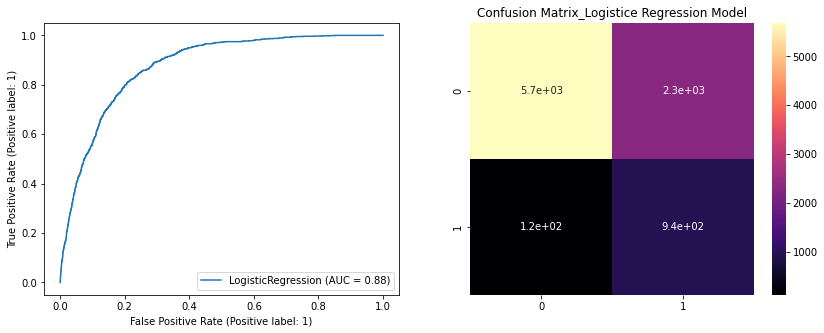

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(log_reg, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_Logistice Regression Model")
sns.heatmap(cm,annot=True,cmap='magma',ax=axes[1])


### Feature Importance

In [ ]:
importance=log_reg.coef_

In [ ]:
importance[0]

array([-0.0326803 ,  0.09020102, -0.02021144,  0.01149881, -0.52760877,
        0.16578648, -0.23336558,  0.36544877,  0.90385759, -0.07083531])

In [ ]:
# list(zip(importance[0],['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
#        'dur', 'num_calls','marital _divorced', 'marital_married',
#        'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
#        'prev_outcome_success', 'prev_outcome_unknown']))

In [ ]:
list(zip(importance[0],['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']))

[(-0.03268029834654355, 'age'),
 (0.09020102123390275, 'education_qual'),
 (-0.020211443613480637, 'day'),
 (0.011498806187402502, 'dur'),
 (-0.5276087659725817, 'num_calls'),
 (0.16578648005143426, 'job'),
 (-0.23336558482607603, 'marital'),
 (0.365448771529739, 'mon'),
 (0.9038575881491259, 'prev_outcome'),
 (-0.07083530697670197, 'call_type')]

In [ ]:
log_reg_imp = LogisticRegression()
X_train = x_train_smt.loc[:,['prev_outcome','num_calls','marital','mon','job']]
X_test = x_test.loc[:,['prev_outcome','num_calls','marital','mon','job']]
# Fit log_reg_imp to the training set
log_reg_imp.fit(X_train, y_train_smt)

AUROC_log_reg_imp = roc_auc_score( y_test, log_reg_imp.predict_proba(X_test)[:, 1])

print("Accuracy: ",log_reg_imp.score(X_train,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, log_reg_imp.predict_proba(X_test)[:, 1]))

Accuracy:  0.6750732924231112
AUROC :  0.7217799425859346


<Axes: title={'center': 'Confusion Matrix_Decision Tree Model'}>

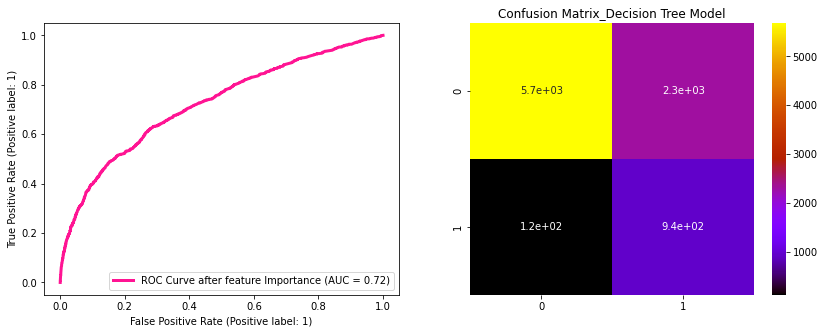

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(log_reg_imp, X_test, y_test,ax=axes[0],name="ROC Curve after feature Importance",c='deeppink',linewidth=3)
plt.title("Confusion Matrix_Decision Tree Model")
sns.heatmap(cm,annot=True,cmap='gnuplot',ax=axes[1])

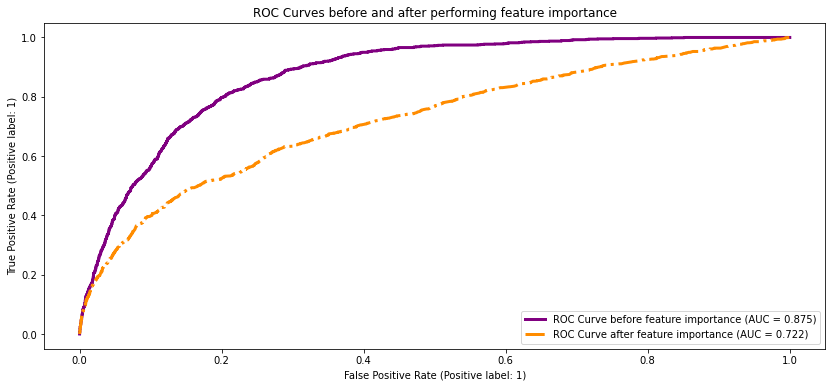

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title("ROC Curves before and after performing feature importance")
roc_Curve=RocCurveDisplay.from_estimator(log_reg, x_test, y_test,label=f"ROC Curve before feature importance (AUC = {AUROC_log_reg:.3f})",color='purple',ax=ax,linewidth=3)
roc_Curve_imp=RocCurveDisplay.from_estimator(log_reg_imp, X_test,y_test,label=f"ROC Curve after feature importance (AUC = {AUROC_log_reg_imp:.3f})",c='darkorange',ax=ax,linewidth=3,linestyle="dashdot")
plt.show()

Reducing the number of features isn't working well

## KNN

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
# x_train_knn_scaled=scaler.transform(x_train)
x_train_smt_scaled=scaler.transform(x_train_smt)
x_test_scaled=scaler.transform(x_test)

Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_smt_scaled, y_train_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test, y_test, cv=10)))
     

K value : 1 Cross Value Accuracy : 0.8492415538062875
K value : 2 Cross Value Accuracy : 0.8773364543098813
K value : 3 Cross Value Accuracy : 0.8704782916931502
K value : 4 Cross Value Accuracy : 0.8831986750110008
K value : 5 Cross Value Accuracy : 0.8779994377352957
K value : 6 Cross Value Accuracy : 0.8817608663765707
K value : 7 Cross Value Accuracy : 0.8820927247836504
K value : 8 Cross Value Accuracy : 0.8833096611743999
K value : 9 Cross Value Accuracy : 0.8784424045372317
K value : 10 Cross Value Accuracy : 0.8810967828680388
K value : 20 Cross Value Accuracy : 0.8818717303085123
K value : 30 Cross Value Accuracy : 0.8807657800811617
K value : 40 Cross Value Accuracy : 0.8827563193663522
K value : 50 Cross Value Accuracy : 0.8814293746638635


In [ ]:
# Training the model on the best value of k
knn= KNeighborsClassifier(8)
knn.fit(x_train_smt_scaled, y_train_smt)
y_pred=knn.predict(x_test_scaled)

print("Accuracy: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test_scaled)[:, 1]))

Accuracy:  0.8048888397301184
AUROC on the sampled dataset :  0.8788664096460177


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
AUROC_knn=roc_auc_score(y_test,knn.predict_proba(x_test_scaled)[:,1])
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",AUROC_knn,"\nConfusion Matrix: ",cm)


Accuracy: 0.8048888397301184 	F1 Score: 0.5072625698324023 	AUROC Score: 0.8788664096460177 
Confusion Matrix:  [[6369 1614]
 [ 150  908]]


<Axes: title={'center': 'Confusion Matrix_KNN Model'}>

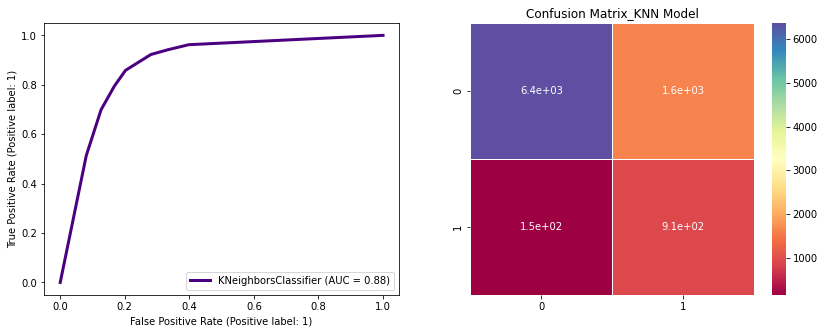

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(knn, x_test_scaled, y_test,ax=axes[0],c='indigo',linewidth=3)

plt.title("Confusion Matrix_KNN Model")
sns.heatmap(cm,annot=True,cmap='Spectral',ax=axes[1],linewidth=1)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
y_pred=dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,y_pred)
# cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,)
# roc_Curve = plot_roc_curve(dt,x_test,y_test)

Accuracy: 0.8166132065037054 	F1 Score: 0.490159901599016 	AUROC Score: 0.7891556300995949


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print(dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.789651011708008


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt)
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) 

  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test, y_test, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.780068102773276  Cross val score :  0.8829775583044052
Depth  :  2  Training Accuracy :  0.7968024473296065  Cross val score :  0.8900556153131569
Depth  :  3  Training Accuracy :  0.8520130378571299  Cross val score :  0.8928208575759058
Depth  :  4  Training Accuracy :  0.858386292040716  Cross val score :  0.8960280887889306
Depth  :  5  Training Accuracy :  0.8707321958592057  Cross val score :  0.894702121938102
Depth  :  6  Training Accuracy :  0.8865924941275015  Cross val score :  0.8941487801300543
Depth  :  7  Training Accuracy :  0.9053480707249122  Cross val score :  0.8908310516794602
Depth  :  8  Training Accuracy :  0.9195513229054756  Cross val score :  0.8895033735882265
Depth  :  9  Training Accuracy :  0.9266529489957572  Cross val score :  0.8865165256930524
Depth  :  10  Training Accuracy :  0.9351566910064278  Cross val score :  0.8869590035691586
Depth  :  20  Training Accuracy :  0.9985796747819436  Cross val score :  0.864394

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 

dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(x_train_smt,y_train_smt) 

AUROC_dt=roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1])

print("Accuracy: ",dt.score(x_train_smt,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Accuracy:  0.858386292040716
AUROC :  0.8612322333351567


<Axes: title={'center': 'Confusion Matrix_Decision Tree Model'}>

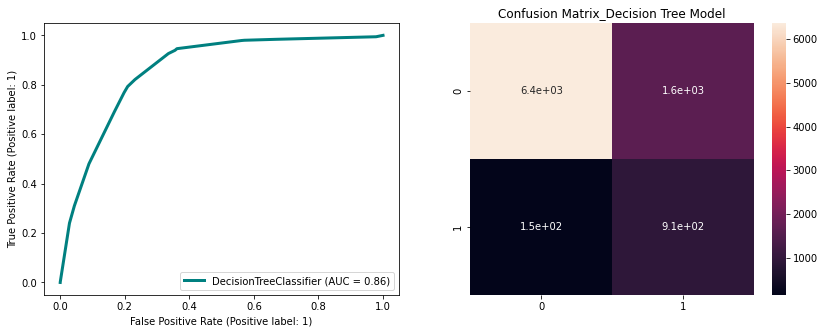

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(dt, x_test, y_test,ax=axes[0],c='teal',linewidth=3)
plt.title("Confusion Matrix_Decision Tree Model")
sns.heatmap(cm,annot=True,cmap='rocket',ax=axes[1])

### Feature Importance

In [ ]:
dt.feature_importances_

array([0.        , 0.        , 0.00851056, 0.68862976, 0.        ,
       0.        , 0.        , 0.15564765, 0.04006459, 0.10714744])

In [ ]:
# importance = dt.feature_importances_
# list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
#        'dur', 'num_calls','marital_divorced', 'marital_married',
#        'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
#        'prev_outcome_success', 'prev_outcome_unknown']))

In [ ]:
importance = dt.feature_importances_
list(zip(importance,['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']))

[(0.0, 'age'),
 (0.0, 'education_qual'),
 (0.00851055682687858, 'day'),
 (0.6886297574927548, 'dur'),
 (0.0, 'num_calls'),
 (0.0, 'job'),
 (0.0, 'marital'),
 (0.15564765277934015, 'mon'),
 (0.04006458884039083, 'prev_outcome'),
 (0.1071474440606356, 'call_type')]

In [ ]:
dt_imp= DecisionTreeClassifier(max_depth = 4)

X_train = x_train_smt.loc[:,['dur','mon','call_type','prev_outcome']]
X_test = x_test.loc[:,['dur','mon','call_type','prev_outcome']]

# Fit dt to the training set
dt_imp.fit(X_train, y_train_smt)

AUROC_dt_imp=roc_auc_score( y_test, dt_imp.predict_proba(X_test)[:, 1])

print("Accuracy: ",dt_imp.score(X_train,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, dt_imp.predict_proba(X_test)[:, 1]))

Accuracy:  0.8583680827430487
AUROC :  0.8615084583094463


<Axes: title={'center': 'Confusion Matrix_Decision Tree Model'}>

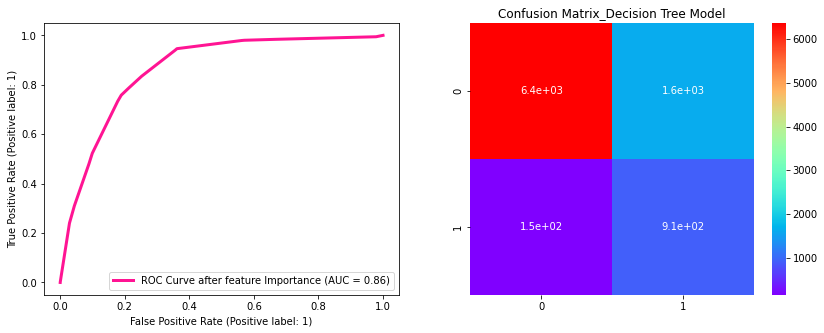

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(dt_imp, X_test, y_test,ax=axes[0],name="ROC Curve after feature Importance",c='deeppink',linewidth=3)
plt.title("Confusion Matrix_Decision Tree Model")
sns.heatmap(cm,annot=True,cmap='rainbow',ax=axes[1])

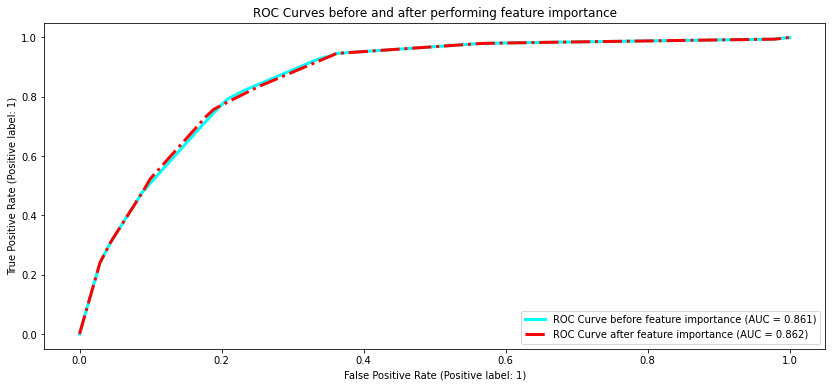

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title("ROC Curves before and after performing feature importance")
roc_Curve=RocCurveDisplay.from_estimator(dt, x_test, y_test,label=f"ROC Curve before feature importance (AUC = {AUROC_dt:.3f})",c='aqua',ax=ax,linewidth=3)
roc_Curve_imp=RocCurveDisplay.from_estimator(dt_imp, X_test,y_test,label=f"ROC Curve after feature importance (AUC = {AUROC_dt_imp:.3f})",c='red',ax=ax,linewidth=3,linestyle="dashdot")
plt.show()
# label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})"

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100,criterion="entropy") 
rf.fit(x_train_smt, y_train_smt) 
y_pred = rf.predict(x_test)
y_pred
     

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
F1_Score_rfc=f1_score(y_test,y_pred)
accuracy_rfc=accuracy_score(y_test,y_pred)

AUROC_rf=roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1])

print("accuracy score: ",accuracy_rfc)
print("F1 score: ",F1_Score_rfc)
print( "AUROC score : ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))

accuracy score:  0.8351952217675036
F1 score:  0.5479368932038836
AUROC score :  0.9118708541094058


In [ ]:
# importance = rf.feature_importances_
# list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
#        'dur', 'num_calls','marital_divorced', 'marital_married',
#        'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
#        'prev_outcome_success', 'prev_outcome_unknown']))

<Axes: title={'center': 'Confusion Matrix_Random Forest Model'}>

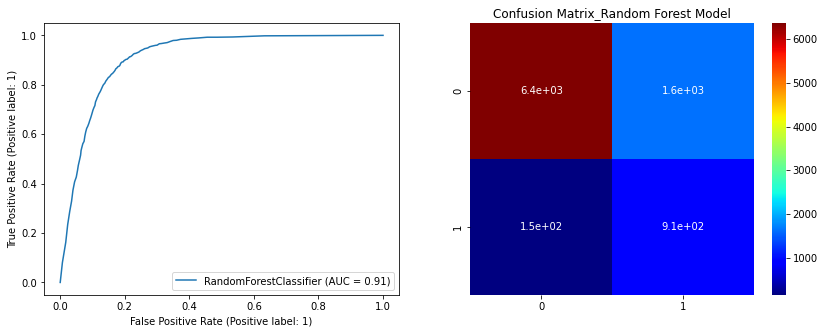

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(rf, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_Random Forest Model")
sns.heatmap(cm,annot=True,cmap='jet',ax=axes[1])

### Feature Importance

In [ ]:
importance = rf.feature_importances_
importance

array([0.08959128, 0.02258976, 0.09007599, 0.45998128, 0.04728317,
       0.04936428, 0.01501902, 0.12696722, 0.04217701, 0.05695098])

In [ ]:
list(zip(importance,['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']))


[(0.08959128243972714, 'age'),
 (0.022589760768531197, 'education_qual'),
 (0.09007598983716236, 'day'),
 (0.4599812828971665, 'dur'),
 (0.047283173044407274, 'num_calls'),
 (0.04936428482593883, 'job'),
 (0.015019015899038339, 'marital'),
 (0.12696721710865527, 'mon'),
 (0.04217701337254888, 'prev_outcome'),
 (0.056950979806824266, 'call_type')]

In [ ]:
rf_imp = RandomForestClassifier(n_estimators=100,criterion="entropy") 

X_train = x_train_smt.loc[:,['dur','age','mon','day','call_type','job','num_calls','prev_outcome']]
X_test = x_test.loc[:,['dur','age','mon','day','call_type','job','num_calls','prev_outcome']]

# Fit df to the training set
rf_imp.fit(X_train, y_train_smt)

AUROC_rf_imp=roc_auc_score( y_test, rf_imp.predict_proba(X_test)[:, 1])

print("Accuracy: ",rf_imp.score(X_train,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, rf_imp.predict_proba(X_test)[:, 1]))

Accuracy:  1.0
AUROC :  0.9113314872554084


<Axes: title={'center': 'Confusion Matrix_Decision Tree Model'}>

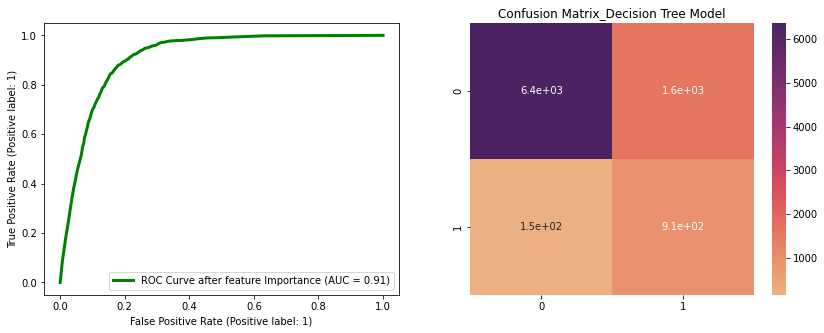

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(rf_imp, X_test, y_test,ax=axes[0],name="ROC Curve after feature Importance",c='green',linewidth=3)
plt.title("Confusion Matrix_Decision Tree Model")
sns.heatmap(cm,annot=True,cmap='flare',ax=axes[1])

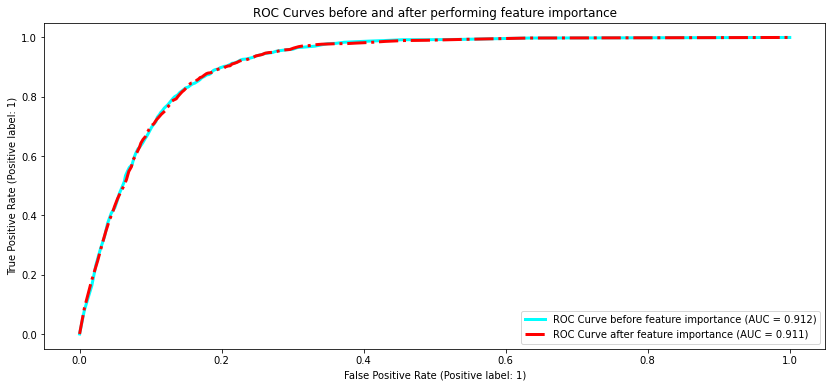

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title("ROC Curves before and after performing feature importance")
roc_Curve=RocCurveDisplay.from_estimator(rf, x_test, y_test,label=f"ROC Curve before feature importance (AUC = {AUROC_rf:.3f})",c='aqua',ax=ax,linewidth=3)
roc_Curve_imp=RocCurveDisplay.from_estimator(rf_imp, X_test,y_test,label=f"ROC Curve after feature importance (AUC = {AUROC_rf_imp:.3f})",c='red',ax=ax,linewidth=3,linestyle="dashdot")
plt.show()

## XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 

for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model_xgb = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model_xgb, x_train, y_train, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9030526936467662
Learning rate :  0.02  Cross-Val score :  0.9035503742161524
Learning rate :  0.03  Cross-Val score :  0.9043522200963492
Learning rate :  0.04  Cross-Val score :  0.9054030362398799
Learning rate :  0.05  Cross-Val score :  0.9049883049806592
Learning rate :  0.1  Cross-Val score :  0.9063156315677443
Learning rate :  0.11  Cross-Val score :  0.906066821866261
Learning rate :  0.12  Cross-Val score :  0.907145269939641
Learning rate :  0.13  Cross-Val score :  0.9068964067175408
Learning rate :  0.14  Cross-Val score :  0.9067580865064434
Learning rate :  0.15  Cross-Val score :  0.9068132356791063
Learning rate :  0.2  Cross-Val score :  0.9056241834283044
Learning rate :  0.5  Cross-Val score :  0.9016701414289943
Learning rate :  0.7  Cross-Val score :  0.8979647562151201
Learning rate :  1  Cross-Val score :  0.8956416709075385


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
model_xgb = xgb.XGBClassifier(learning_rate = 0.12, n_estimators=100, verbosity = 0)
model_xgb.fit(x_train_smt,y_train_smt)

AUROC_xgb=roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1])

print("Accuracy: ",model_xgb.score(x_test,y_test),"\nAUROC score:",roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1]))

Accuracy:  0.8313239685875456 
AUROC score: 0.9111435287699026


<Axes: title={'center': 'Confusion Matrix_XG Boost Model'}>

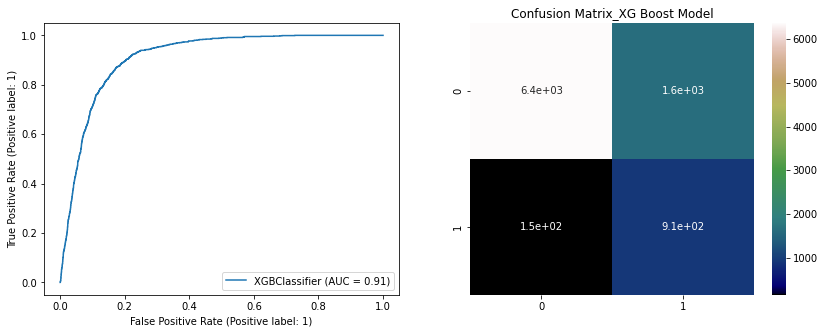

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(model_xgb, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_XG Boost Model")
sns.heatmap(cm,annot=True,cmap='gist_earth',ax=axes[1])

### Feature Importance

In [ ]:
importance=model_xgb.feature_importances_

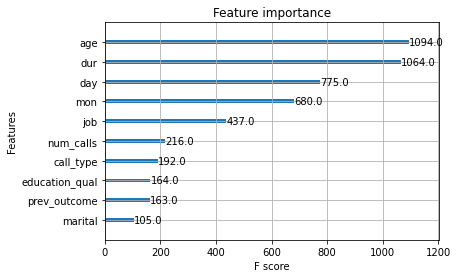

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model_xgb)
plt.show()

In [ ]:
list(zip(importance,['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']))


[(0.043461476, 'age'),
 (0.04543861, 'education_qual'),
 (0.04152591, 'day'),
 (0.2361064, 'dur'),
 (0.07555508, 'num_calls'),
 (0.041088715, 'job'),
 (0.023270097, 'marital'),
 (0.14455058, 'mon'),
 (0.15800738, 'prev_outcome'),
 (0.19099577, 'call_type')]

In [ ]:
model_xgb_imp = xgb.XGBClassifier(learning_rate = 0.12, n_estimators=100, verbosity = 0)

X_train = x_train_smt.loc[:,['dur','call_type','prev_outcome','mon','num_calls','education_qual','age','day']] #'job'
X_test = x_test.loc[:,['dur','call_type','prev_outcome','mon','num_calls','education_qual','age','day']]

model_xgb_imp.fit(X_train,y_train_smt)

AUROC_xgb_imp=roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1])

print("Accuracy: ",model_xgb_imp.score(X_train,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, model_xgb_imp.predict_proba(X_test)[:, 1]))

Accuracy:  0.9641276835952437
AUROC :  0.9156793370221739


<Axes: title={'center': 'Confusion Matrix_Decision Tree Model'}>

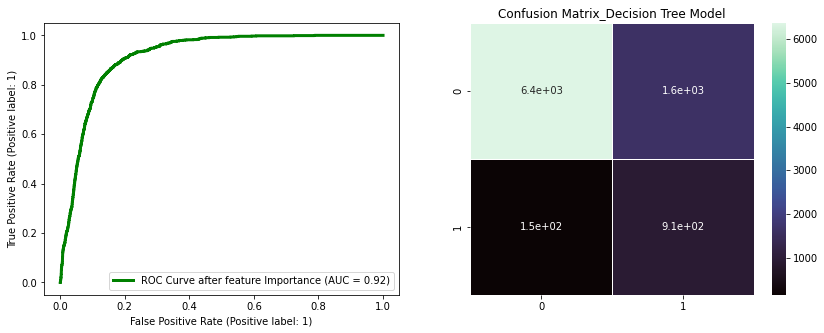

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(model_xgb_imp, X_test, y_test,ax=axes[0],name="ROC Curve after feature Importance",c='green',linewidth=3)
plt.title("Confusion Matrix_Decision Tree Model")
sns.heatmap(cm,annot=True,cmap='mako',ax=axes[1],linewidth=1)

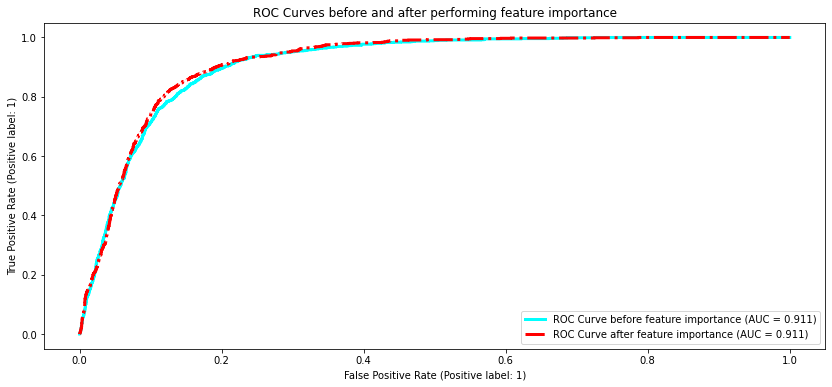

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title("ROC Curves before and after performing feature importance")
roc_Curve=RocCurveDisplay.from_estimator(model_xgb, x_test, y_test,label=f"ROC Curve before feature importance (AUC = {AUROC_xgb:.3f})",c='aqua',ax=ax,linewidth=3)
roc_Curve_imp=RocCurveDisplay.from_estimator(model_xgb_imp, X_test,y_test,label=f"ROC Curve after feature importance (AUC = {AUROC_xgb_imp:.3f})",c='red',ax=ax,linewidth=3,linestyle="dashdot")
plt.show()

## ROC Curves of all models

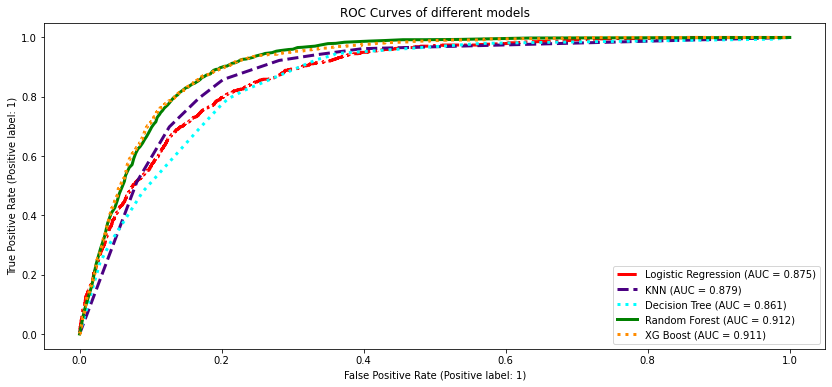

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.title("ROC Curves of different models")

roc_Curve_log_reg=RocCurveDisplay.from_estimator(log_reg, x_test, y_test,label=f"Logistic Regression (AUC = {AUROC_log_reg:.3f})",color='red',ax=ax,linewidth=3,linestyle="dashdot")

roc_Curve_knn=RocCurveDisplay.from_estimator(knn, x_test_scaled, y_test,label=f"KNN (AUC = {AUROC_knn:.3f})",c='indigo',linewidth=3,ax=ax,linestyle="dashed")

roc_Curve_dt=RocCurveDisplay.from_estimator(dt, x_test, y_test,label=f"Decision Tree (AUC = {AUROC_dt:.3f})",c='aqua',ax=ax,linewidth=3,linestyle="dotted")

roc_Curve_rf=RocCurveDisplay.from_estimator(rf, x_test, y_test,label=f"Random Forest (AUC = {AUROC_rf:.3f})",c='green',ax=ax,linewidth=3,linestyle='-')

roc_Curve_xgb=RocCurveDisplay.from_estimator(model_xgb, x_test, y_test,label=f"XG Boost (AUC = {AUROC_xgb:.3f})",c='darkorange',ax=ax,linewidth=3,linestyle=":")

# **Conclusion:**


## **Models are tested to see which one can better predict consumer conversion.**

LOGISTIC REGRESSION, the model AUROC score is 0.87

KNN model AUROC score is 0.87

DECISION TREE with max depth, the model AUROC score is 0.86

RANDOM FOREST, the model AUROC score is 0.91

XG BOOST CLASSIFIER, the model AUROC score is 0.91

*XG BOOST and Random Forest models* have the highest AUROC score among the all ML models.



**IMPORTANT FEATURES FOR MAKING PREDICTIONS:**

Duration of the call: The length of time spent in interacting with consumers have a significant influence on conversion.

Month : March has highest rate of conversion, this is in line of our genreal knowledge that in India the financial year close in Month, so many employees purchase policies for tax benifit. Rather than approachin the customers in the month of May it is recomended to approach them in March, followed by December

Pervious outcome unknown : It's crucial to improve our first impression. Because the preceding result greatly influences customers' decisions

Marital_married: People who are married are more likely to subscribe to a policy.


### **Inference from Bi-variate analysis of categorical columns:**
1.   **Job column:** Students and retired people have more conversion rate. But the business firm has contacted blue-collared people more where the conversion rate is the poorest among the all categories (This may be the reason that they are less educated and might have receiving the benefits of health schemes by the Government). Hence it is recommended to reach students, retired, unemployed and management people having conversion rates of 29%,23%,16% and 14% respectively, rather than reaching blue-collared people.

2.   **Marital column:** Singles have the highest rate of conversion 14.95%, where as married people has lowest conversion rate 10.12%. Therefore it is recommended to reach sinlges rather than married.

3.   **Education Qualification column:** Tertiary category has the highest rate of conversion 15%, secondary category have 10.56% and the lowest is 8.62% for primary. Therefore contacting the higher educated people will result in more success in converting them to subscribe to a policy.

4.  **Call type column:** Cellular has the highest rate of conversion 14.9%. Also the firm contacting more to Cellular type.

5.   **Month column:** March has highest rate of conversion 51.99%, this is in line with our genreal knowledge that in India the financial year closes in March, so many employees purchase policies for tax benifit. Rather than approaching the customers in the month of May(only 6.71% of conversion rate) it is recomended to approach them in March, followed by December(46.7%),September(46.4%) and October(43.7%).

6.   **Previous Outcome column:** If the previous outcome of the call is 'success' the conversion rate of that call is 64.7%! Ofcourse the word itself means that only. Also the firm has some scope here to do some research, why though the previous outcome of the call is success, some people aren't purchasing the policy. Chasing such type of customers once again may result in full success of converting them to purchase a policy.

